# How do you speak Matplotlib?

A *matplotlib* visualization is a `figure` onto which is attached one or more `axes`. Each `axes` has a horizontal (x) `axis` and vertical (y) `axis`, and the data is encoded using color and glyphs such as `markers` (for example circles) or `lines` or polygons (called `patches`). The figure below annotates these parts of a visualization and was created by Nicolas P. Rougier using `matplotlib`. The source code can be found in the [matplotlib documentation](https://matplotlib.org/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py).

![Diagram of the components of the matplotlib generated visualization.](<img src="mpl_anatomy.png">

# Import matplotlib & tell Jupyter to draw things

In [70]:
%config InlineBackend.figure_format = 'retina'  # change this to png if your plots are too small
import matplotlib.pyplot as plt
import numpy as np

### What is this backend thing?

Backends are the rendering engines matplotlib use to transform the Python code into pixels on the screen. Matplotlib supports many different static and interactive [backends](https://matplotlib.org/3.1.0/api/index_backend_api.html). 

The following line of code prints the current backend:

In [71]:
import matplotlib
%matplotlib inline
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

We told matplotlib to use the ipython inline backend when we typed `%matplotlib inline`

the `inline` backend results in static, non-interactive images.  Later in this tutorial we will cover how to use interactive backends in the notebook.

# Let's make that figure

A Matplotlib [figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) is like an empty sheet of paper (or a blank canvas) on which we will draw all our plots, images, and diagrams. Here, the ipython backend decided to not render anything because we have not yet added any plots to our figure.

In [72]:
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

# Figure+ Axes (plotting surface)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

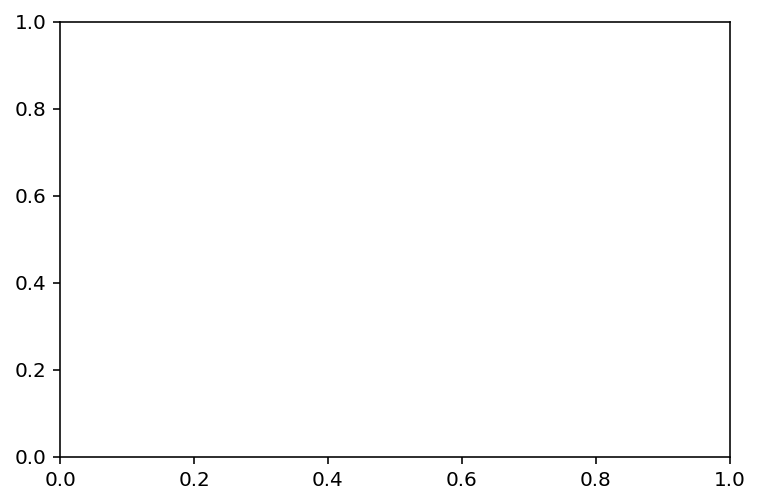

In [75]:
plt.subplots()

The x and y ticks and the box let us know that the axes was created. Let's assign the output of `plt.subplots`-which is a helper function that creates the figure and axes-to variables so that we can manipulate the figure and axes directly. 

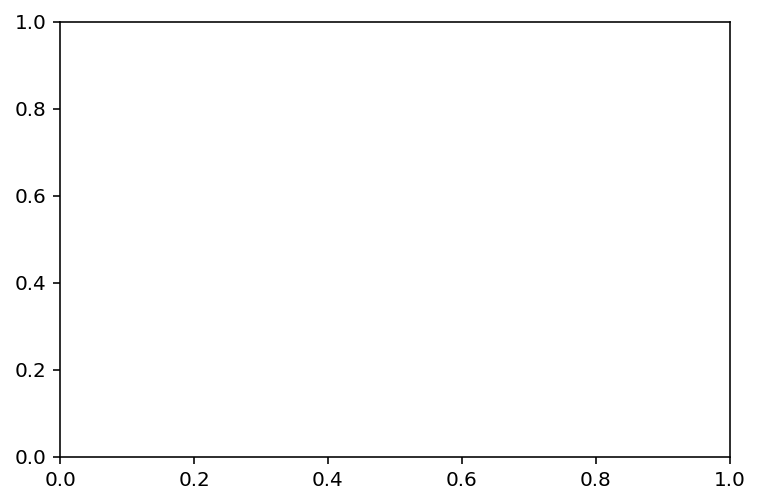

In [77]:
fig, ax = plt.subplots()

## Adjusting figure size
We can make the figure bigger or smaller using the `figsize=(width, height)` keyword construction. The default is 8x6

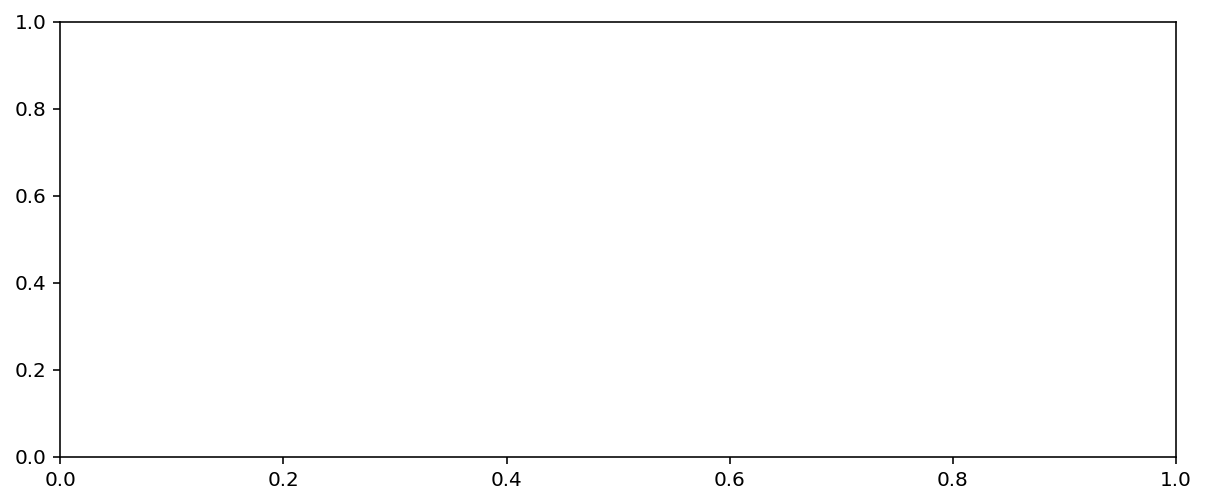

In [80]:
fig, ax = plt.subplots(figsize=(10,4))

# Add data to the figure using a plotting method

First, lets use `Pandas` to open our titanic dataset so that we have something to plot!

In [83]:
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")

In [86]:
df.dropna(inplace=True)

In [88]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


Matplotlib supports many, many, many different plot types. Peruse the [gallery](https://matplotlib.org/gallery.html) to find some you like! 

A hopefully full list of supported plot methods is at https://matplotlib.org/3.1.0/api/axes_api.html#plotting 

Here we will use the `ax.plot` method from our installation test. This function is usually used to create line plots, but it can be used to create scatter plots when the marker is set to `'o'`. We use `.plot` here instead of `.scatter` so that we do not have to generate x-values to plot against.

In [89]:
df['age']

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 182, dtype: float64

In [106]:
df['age'].shape

(182,)

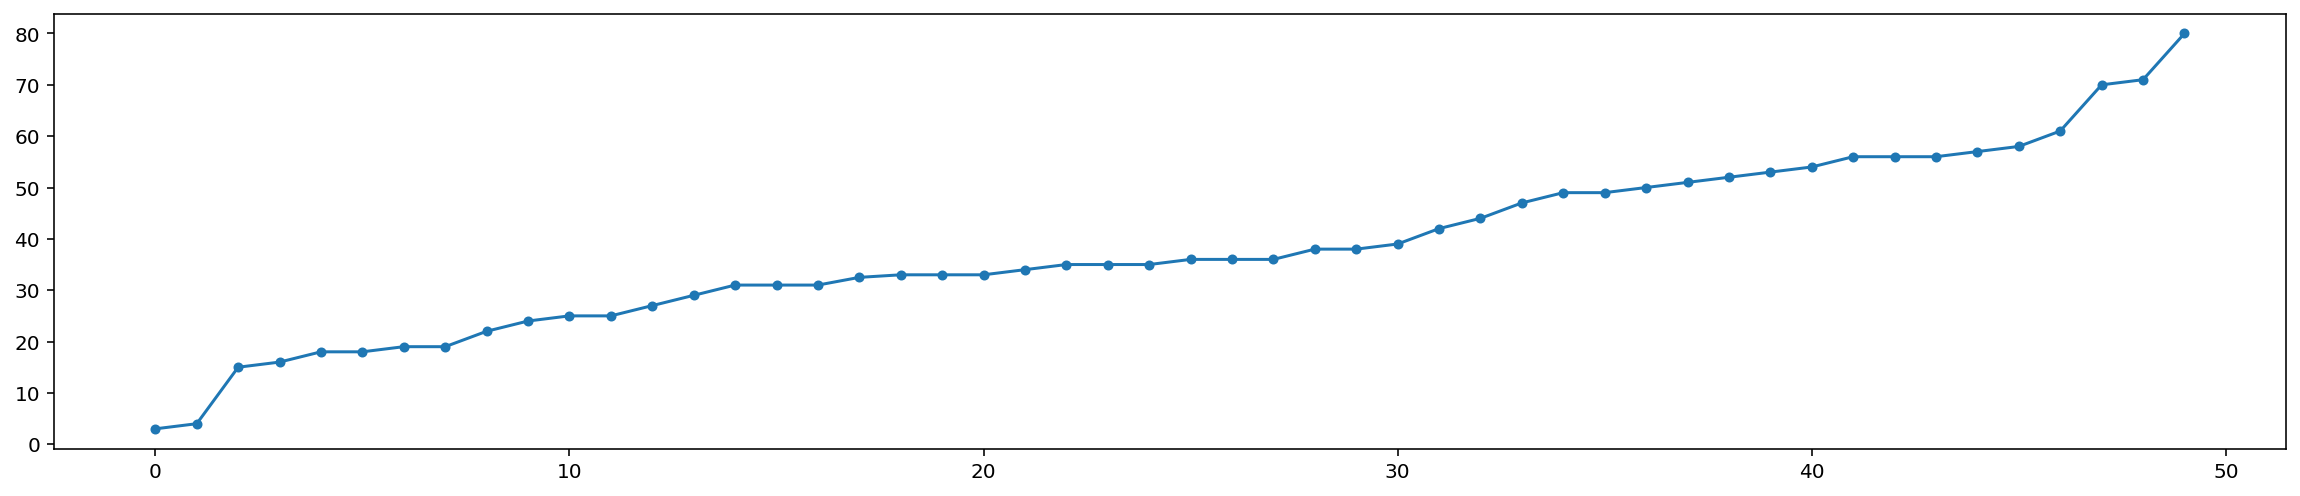

In [113]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].sample(50).values),marker='o',markersize=4)

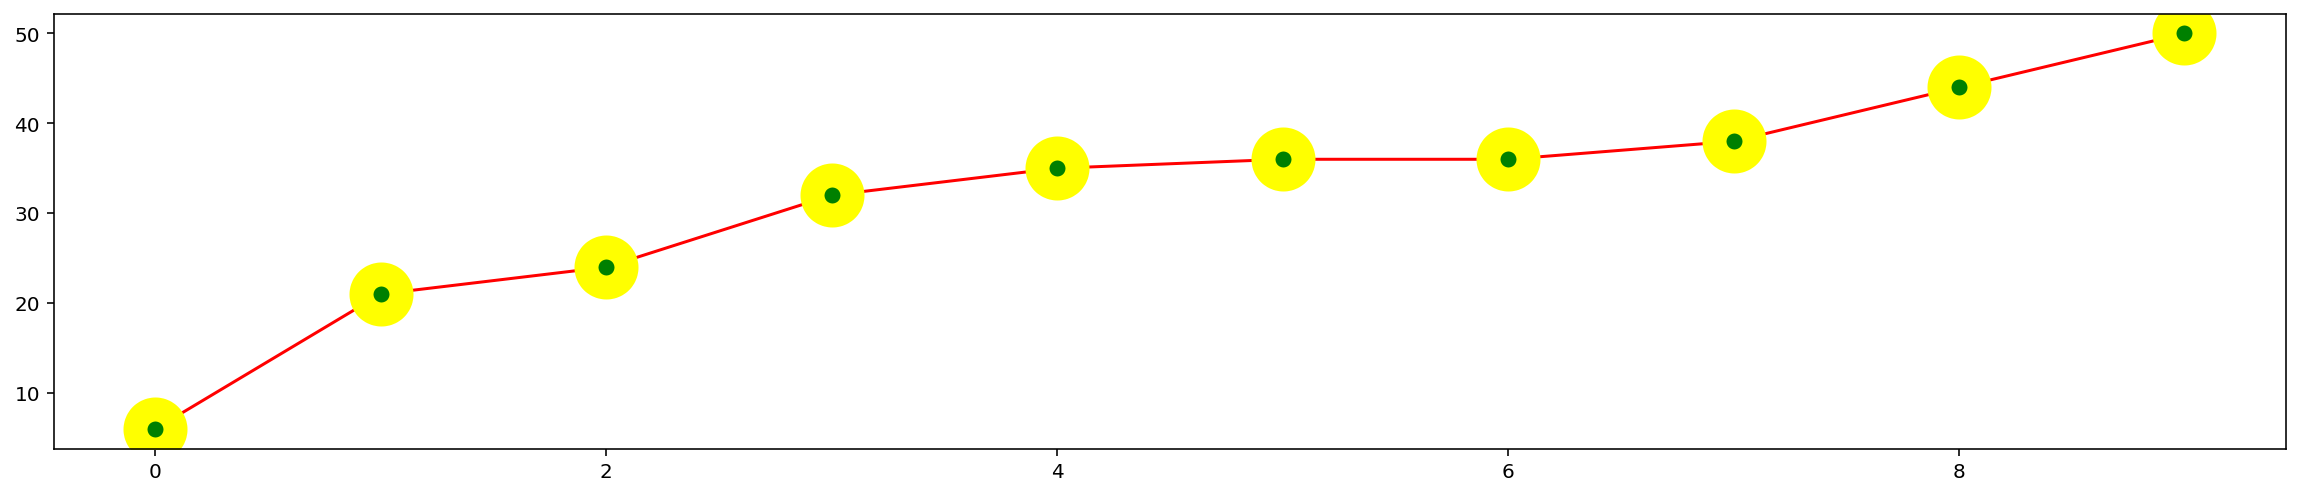

In [134]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].sample(10).values),marker='o',markersize=20,color='red',markerfacecolor='green',markeredgecolor='yellow',markeredgewidth=12)

In [ ]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].sample(10).values),marker='o',markersize=20,color='red',markerfacecolor='green',markeredgecolor='yellow',markeredgewidth=12)

__troubleshooting__:
If your figure looks "fuzzy" it is likely you have a hi-dpi (aka 'retnia' display), try running

```ipython
%config InlineBackend.figure_format = 'retina'  # tell IPython to use hi-dpi pngs
```   
And then re-rendering your figure by typing `<shift> + <enter>` in the above notebook cell.

# What are we plotting? Let's label

You can label almost everything in matplotlib. The most commonly used labeling methods are to set the:
* title: `set_title`
* x axis label: `set_xlabel`
* y axis label: `set_ylabel`

Text(0.5, 1.0, 'Age Spread Analysis')

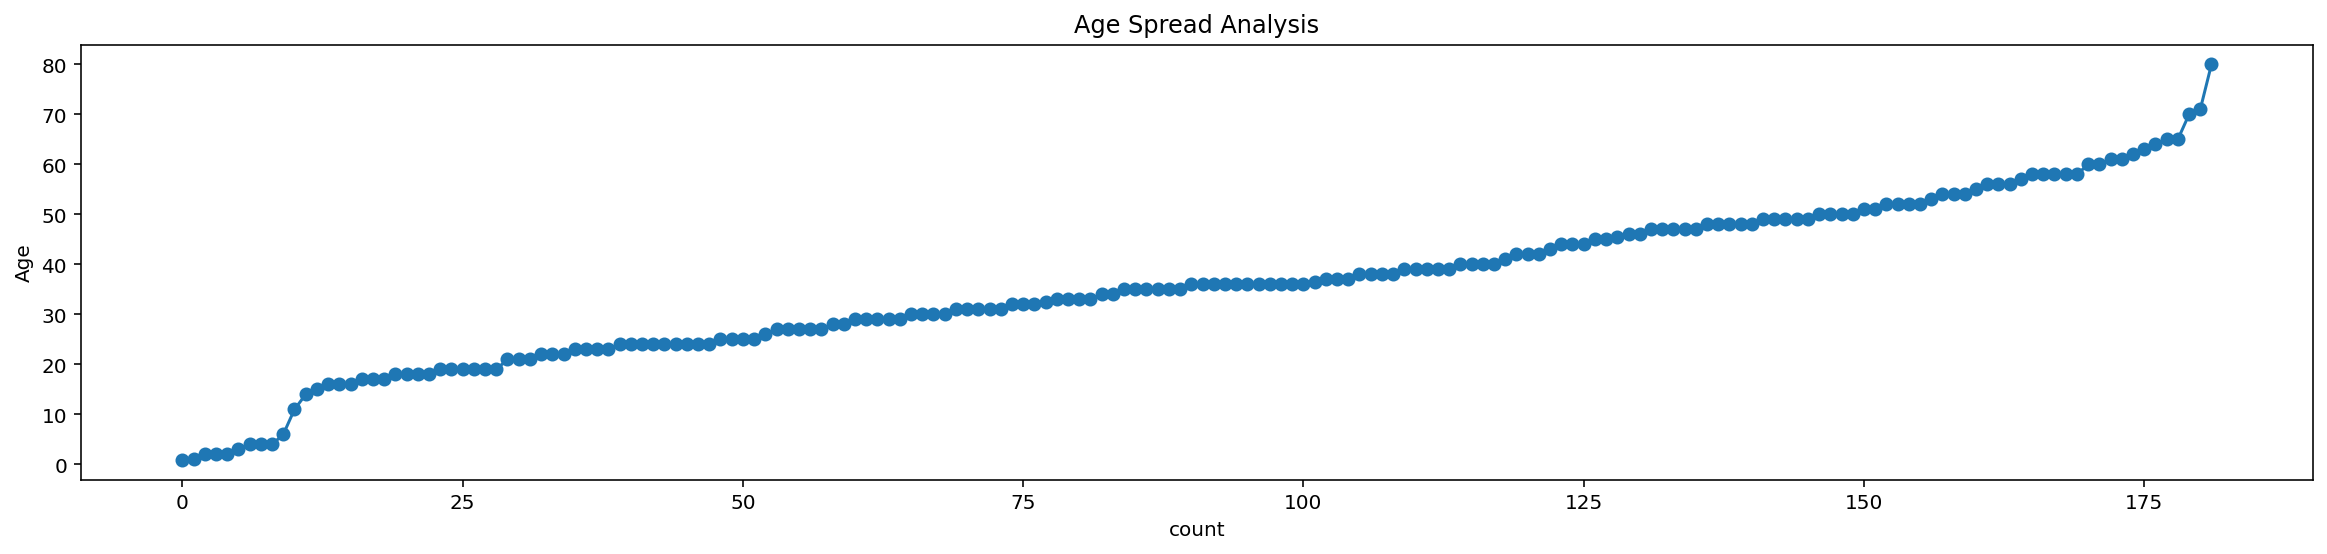

In [143]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].values),marker='o')
ax.set_ylabel("Age")
ax.set_xlabel("count")
ax.set_title("Age Spread Analysis")

(0.0, 75.0)

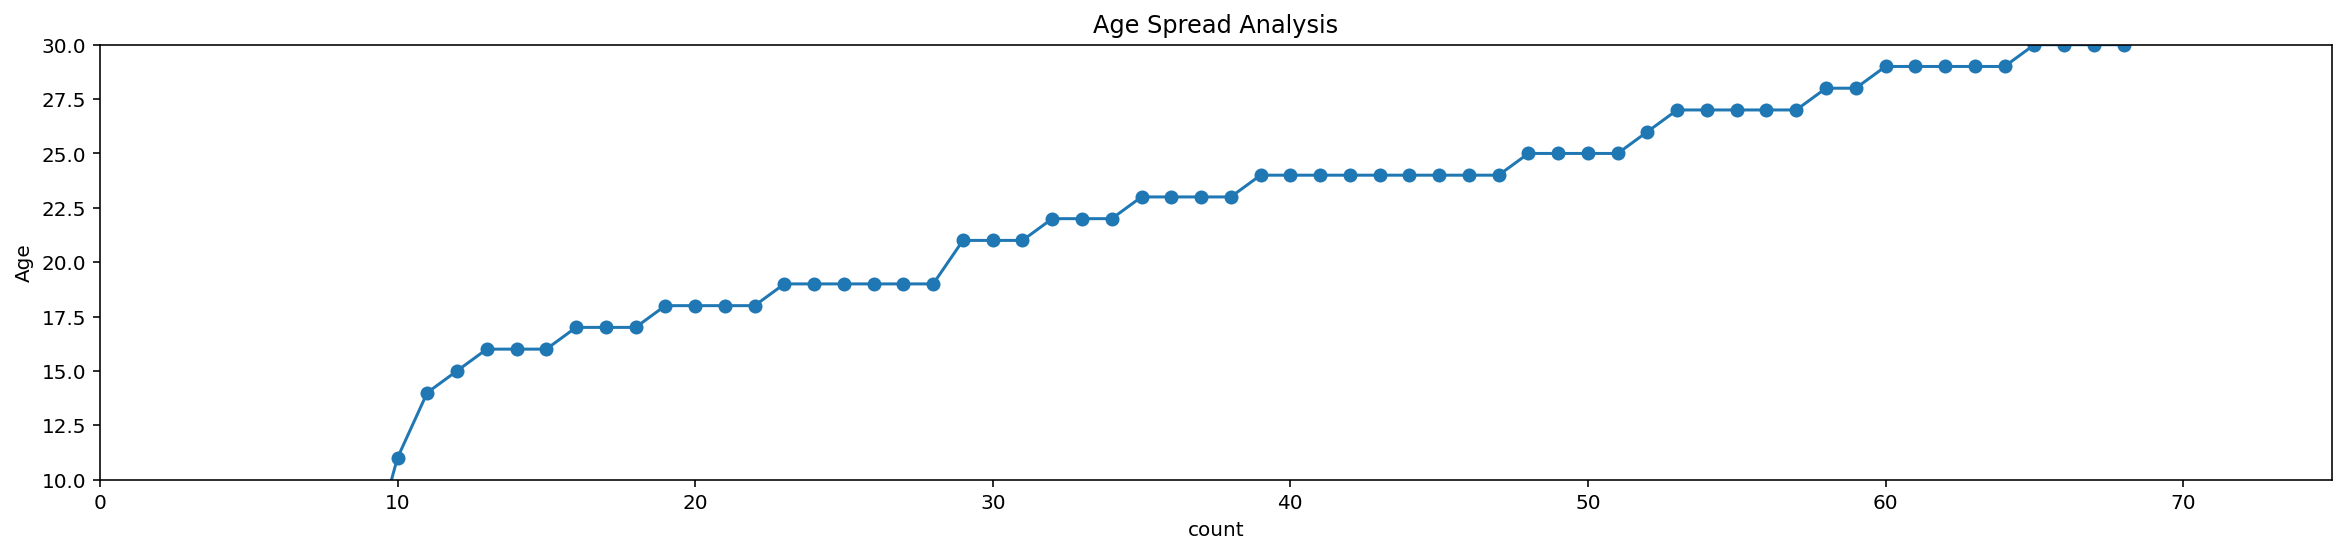

In [144]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].values),marker='o')
ax.set_ylabel("Age")
ax.set_xlabel("count")
ax.set_title("Age Spread Analysis")
#ax.set_yticks([10,20,30,40,50]) ### display the values in requested format in corresponding axis
ax.set_ylim(10,30) ### Restrict the output display with in the ranges
ax.set_xlim(0,75) ### Restrict the output display with in the ranges

# Let's change up the y axis

Instead of breaking the ages up by 10, lets use the US census demographic groupings:
 * Children: 0–14 years
 * Youth: 15–24 years 
 * Adult: 25–54 years 
 * Older Adult: 55–64 years
 * Senior: 65 years and over

Ticks can primarily be customized in two ways:
* [Locators](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html): where the tick is
* [Formatters](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html): what the tick looks like

First we use the `.set_yticks()` method to place our ticks according to the demographic group.

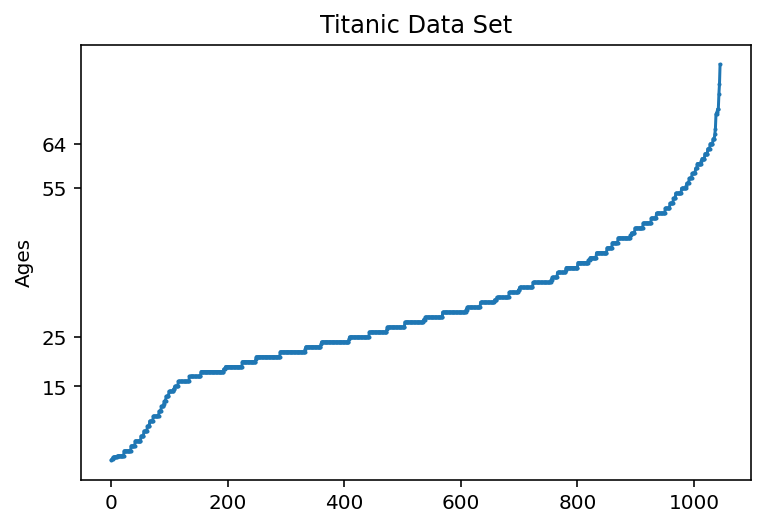

In [16]:
fig, ax = plt.subplots()
_ = ax.set_title ("Titanic Data Set")
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_ylabel("Ages")
_ = ax.set_yticks([15,25, 55, 64])

 Now we use `.set_yticklabels()` to replace the labels that were automatically generated based on the tick locations with manually defined labels. 

[Text(0, 10, 'rank1'),
 Text(0, 20, 'rank2'),
 Text(0, 30, 'rank3'),
 Text(0, 40, 'rank4'),
 Text(0, 50, 'rank5')]

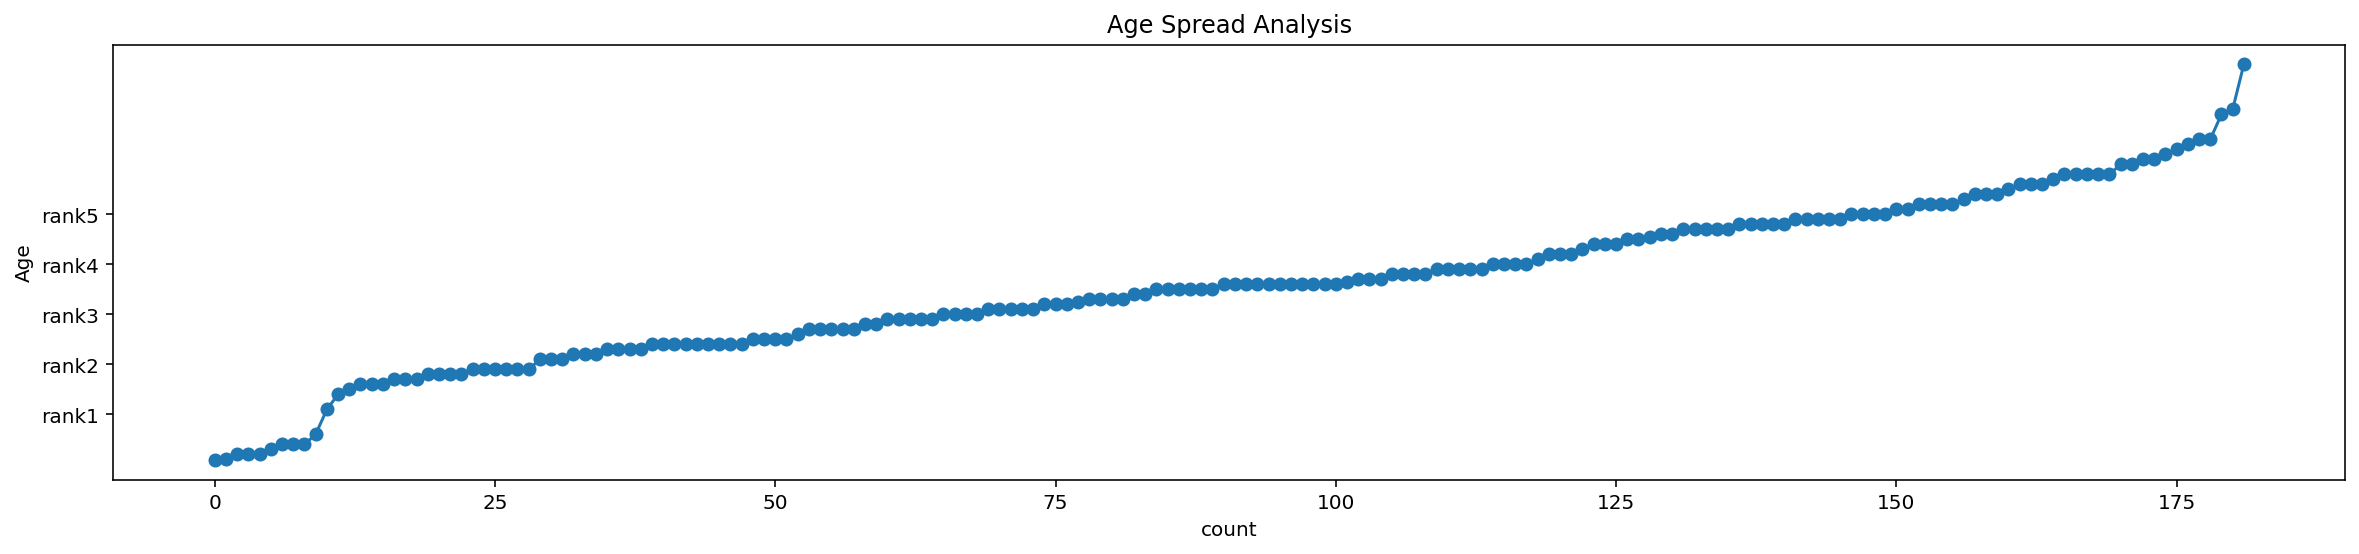

In [149]:
fig,ax=plt.subplots(figsize=(20,4)) #### Declaring the layout #### we have assigned data to the axis
ax.plot(np.sort(df['age'].values),marker='o')
ax.set_ylabel("Age")
ax.set_xlabel("count")
ax.set_title("Age Spread Analysis")
ax.set_yticks([10,20,30,40,50]) ### display the values in requested format in corresponding axis
ax.set_yticklabels(['rank1','rank2','rank3','rank4','rank5'])


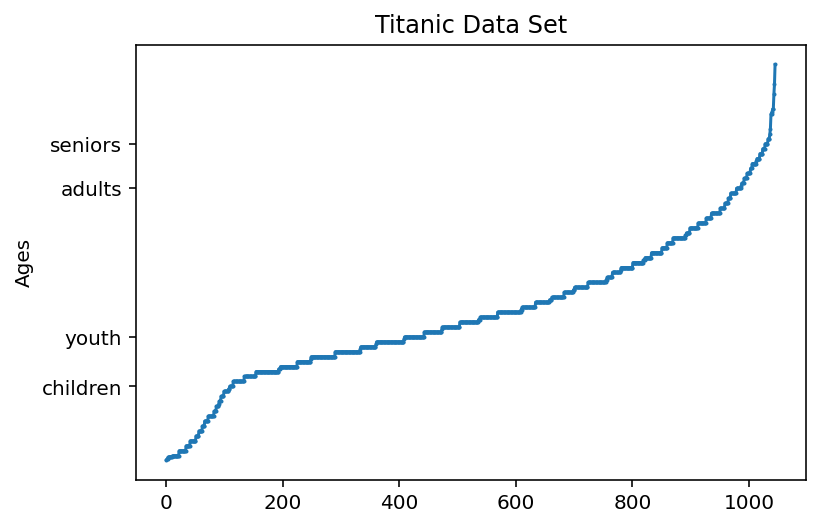

In [17]:
fig, ax = plt.subplots()
_ = ax.set_title ("Titanic Data Set")
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_ylabel("Ages")
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

# Putting it all together: Let's look at fares!

* First Class Suite- £870 or $4,350

* First Class Berth- £30 or $150

* Second Class- £12 or $60

* Third Class- £3 to £8 or $40

source: (Wilkinson & Hamilton, 2011) from [Titanic: The Whole Iceberg](https://autumnmccordckp.weebly.com/tickets-and-accomodations.html)

## Tasks
1. Create a figure and an axis
2. Plot the "fare" column
3. Label the y-axis "fare"
4. Set the y tick locations using the fare class boundaries: [3, 12, 30, 870]
5. Set the y tick labels using the fare class boundaries: [3rd, 2nd, 1st B, 1st S]

In [ ]:
#We'll work through the solution together here


# Let's put more than one image on the page

Matplotlib offers a lot of flexibility in creating images that have multiple figures, and you can read all about them in the [customizing figures tutorial](https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py). We will briefly touch on using subplots, constrained_layout, and a drop of grid_spec. 

## Multiple Axes

Let's put our two axes together on one figure, using `subplots` with the ncols kwarg to create a figure with two axes side by side. 

We can use the `Figure` method `suptitle` to put a figure-level title on the plot.

Text(0.5, 0.98, 'Sample 1 and Sample2')

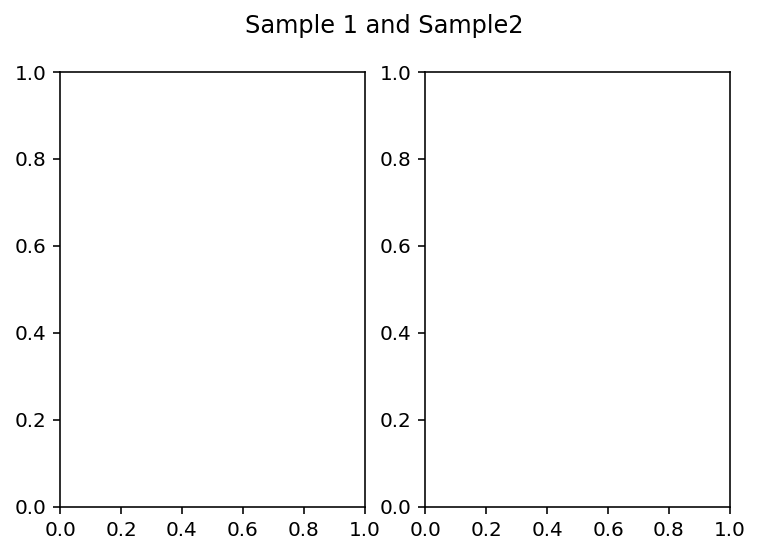

In [152]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Sample 1 and Sample2')

In [178]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [181]:
[[ax1,ax2,ax3,ax4]]

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<AxesSubplot:>

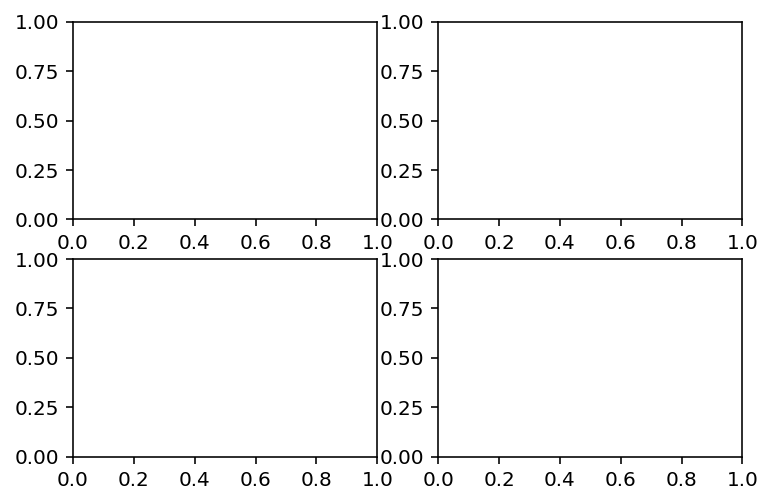

In [187]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

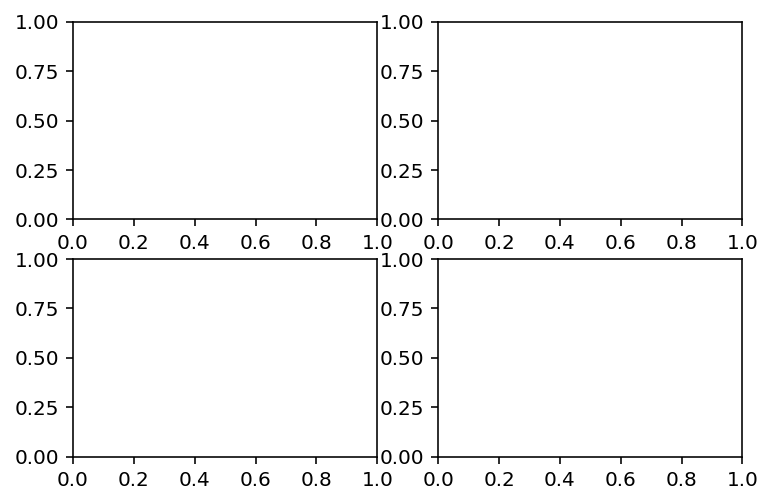

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

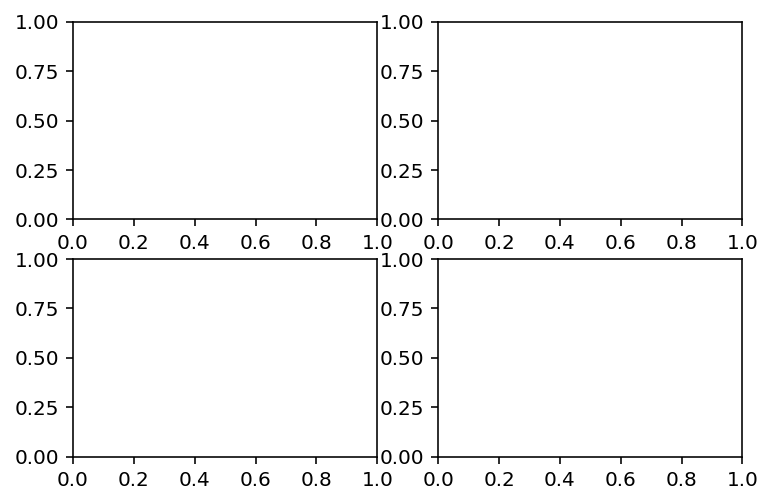

In [196]:
plt.subplots(nrows=2,ncols=2)

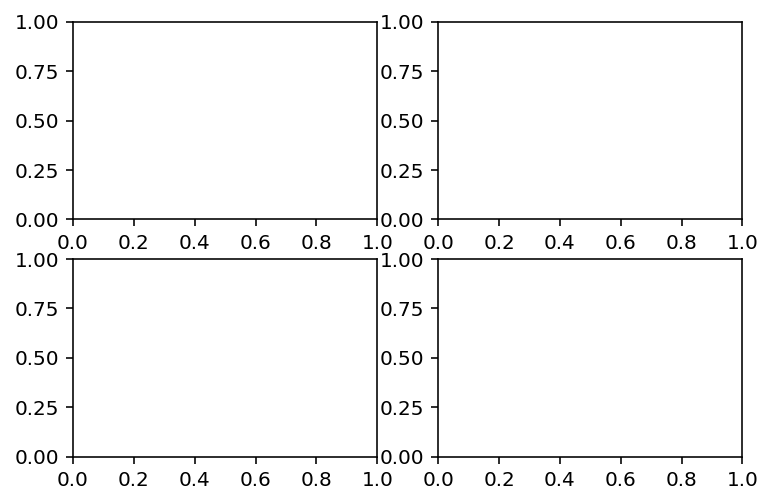

In [198]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=2)


In [199]:
(ax1,ax2)

(array([<AxesSubplot:>, <AxesSubplot:>], dtype=object),
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

In [207]:
ax2

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

Text(0.5, 1.0, 'Age Spread Analysis')

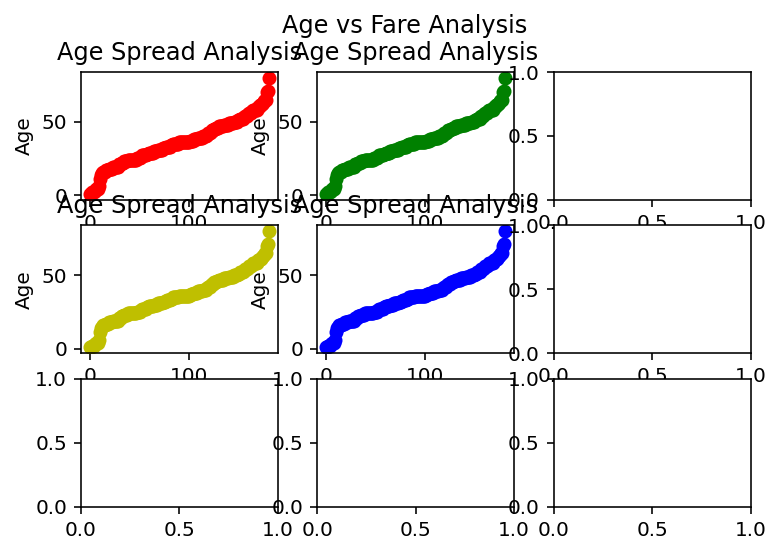

In [213]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=3)
fig.suptitle('Age vs Fare Analysis')

ax1[0].plot(np.sort(df['age'].values),marker='o',color='r')
ax1[0].set_ylabel("Age")
ax1[0].set_xlabel("count")
ax1[0].set_title("Age Spread Analysis")

ax1[1].plot(np.sort(df['age'].values),marker='o',color='g')
ax1[1].set_ylabel("Age")
ax1[1].set_xlabel("count")
ax1[1].set_title("Age Spread Analysis")

ax2[0].plot(np.sort(df['age'].values),marker='o',color='y')
ax2[0].set_ylabel("Age")
ax2[0].set_xlabel("count")
ax2[0].set_title("Age Spread Analysis")

ax2[1].plot(np.sort(df['age'].values),marker='o',color='b')
ax2[1].set_ylabel("Age")
ax2[1].set_xlabel("count")
ax2[1].set_title("Age Spread Analysis")





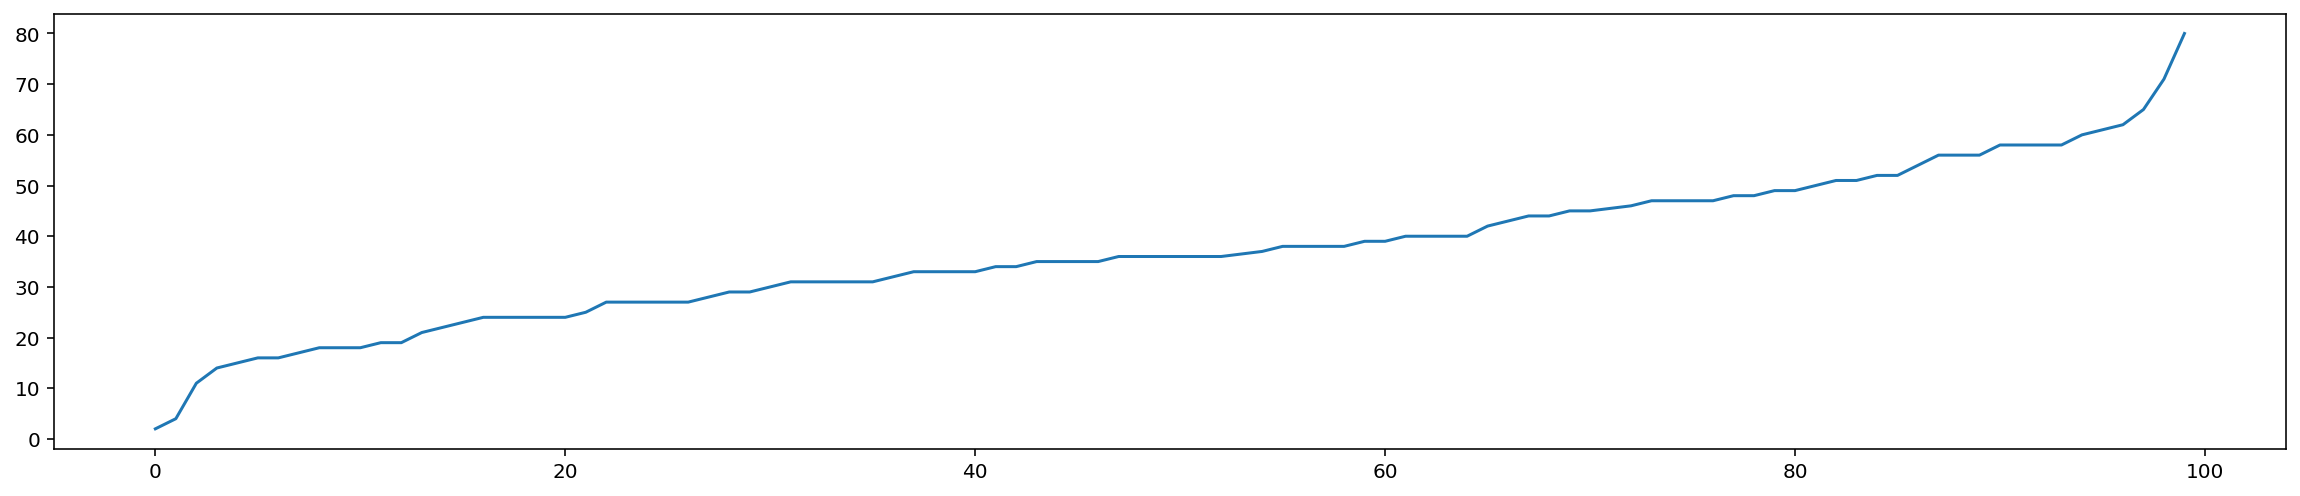

In [248]:
fig,ax=plt.subplots(figsize=(20,4))
ax.plot(np.sort(df['age'].sample(100).values))

In [253]:
ax[0]

<AxesSubplot:>

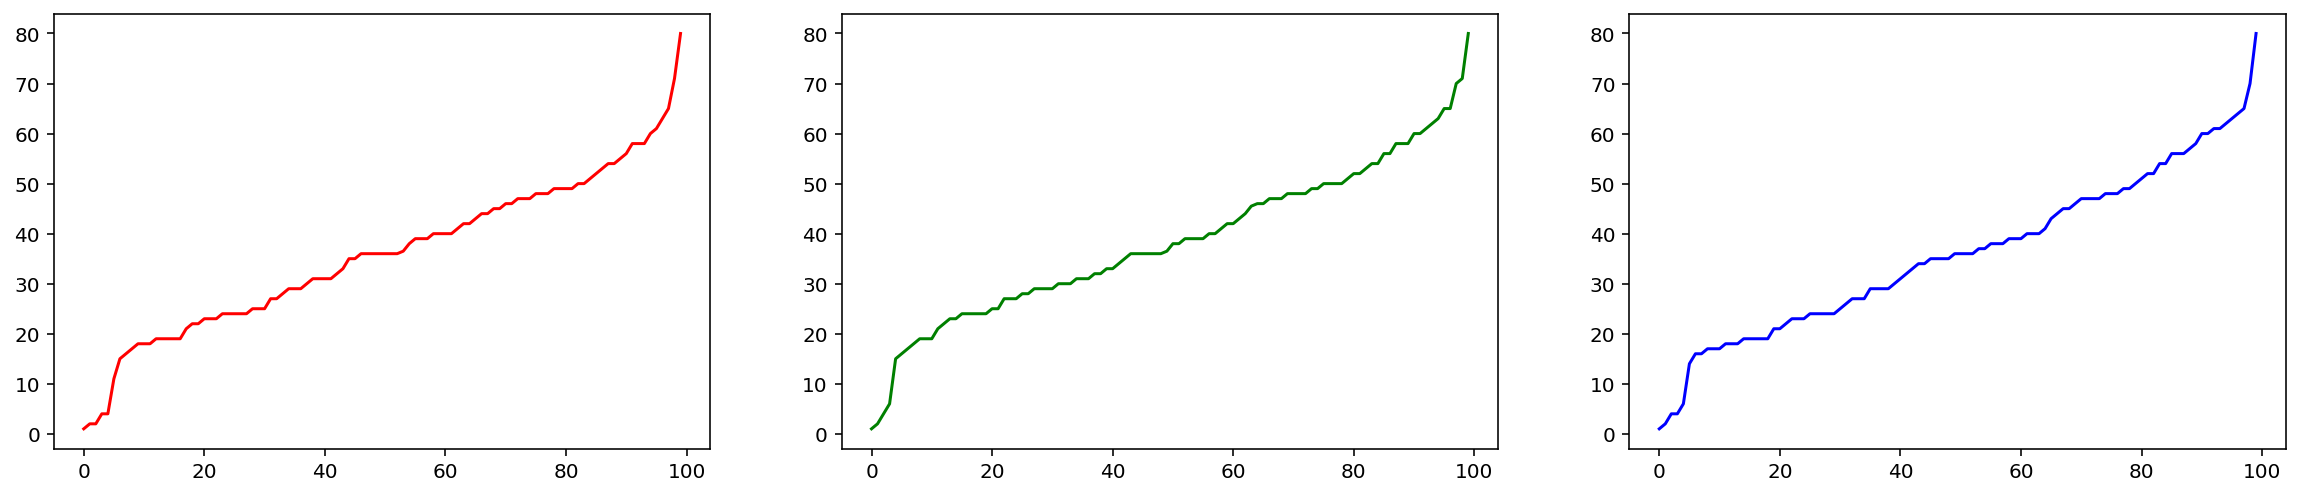

In [254]:
fig,ax=plt.subplots(figsize=(20,4),ncols=3)
ax[0].plot(np.sort(df['age'].sample(100).values),color='r')
ax[1].plot(np.sort(df['age'].sample(100).values),color='g')
ax[2].plot(np.sort(df['age'].sample(100).values),color='b')


In [256]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

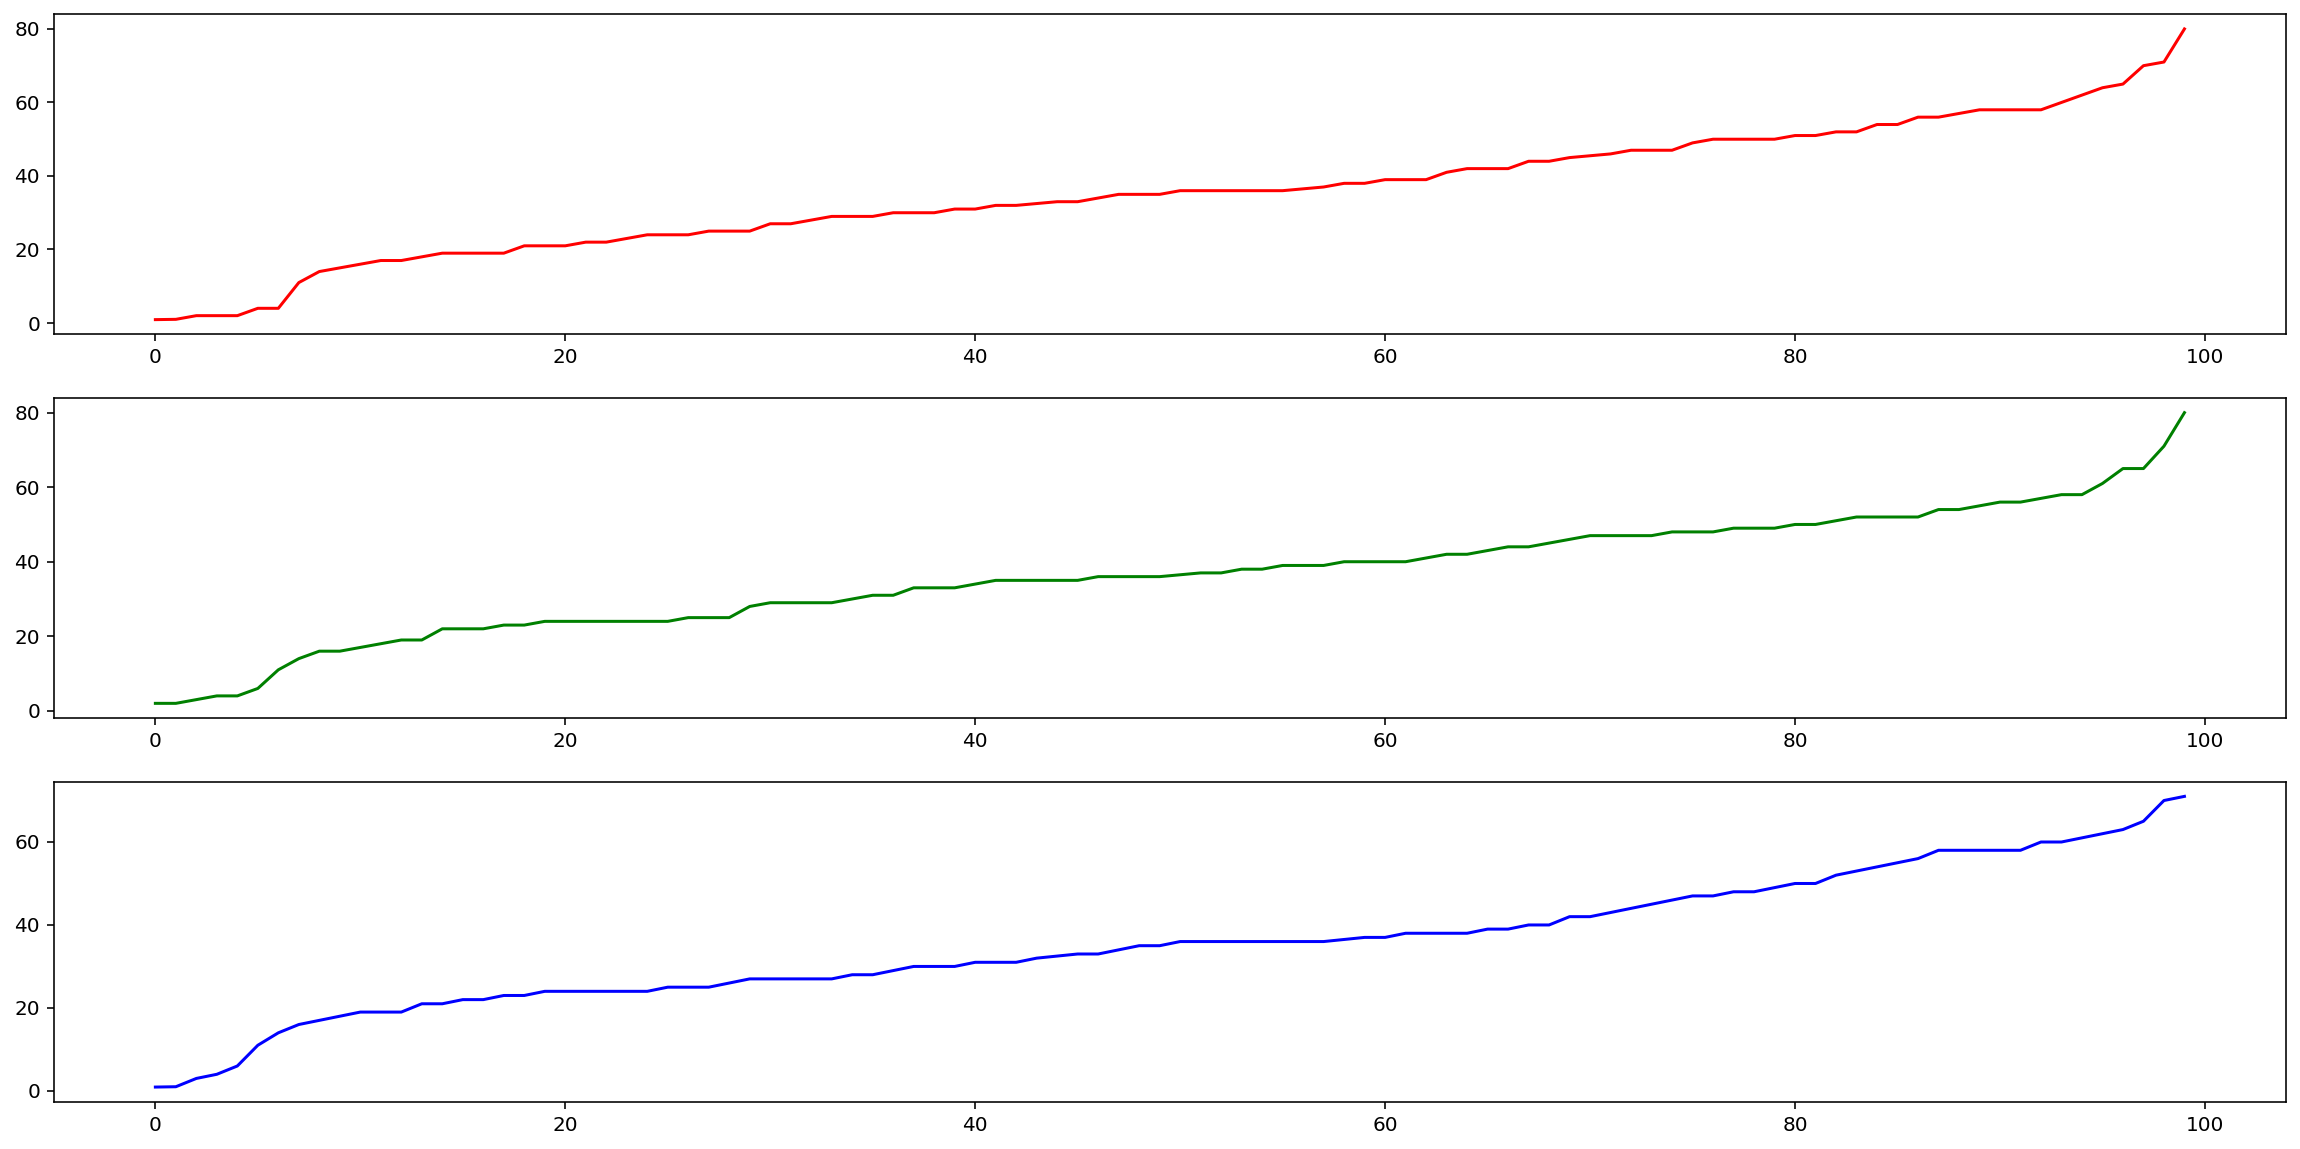

In [255]:
fig,ax=plt.subplots(figsize=(20,10),nrows=3)
ax[0].plot(np.sort(df['age'].sample(100).values),color='r')
ax[1].plot(np.sort(df['age'].sample(100).values),color='g')
ax[2].plot(np.sort(df['age'].sample(100).values),color='b')


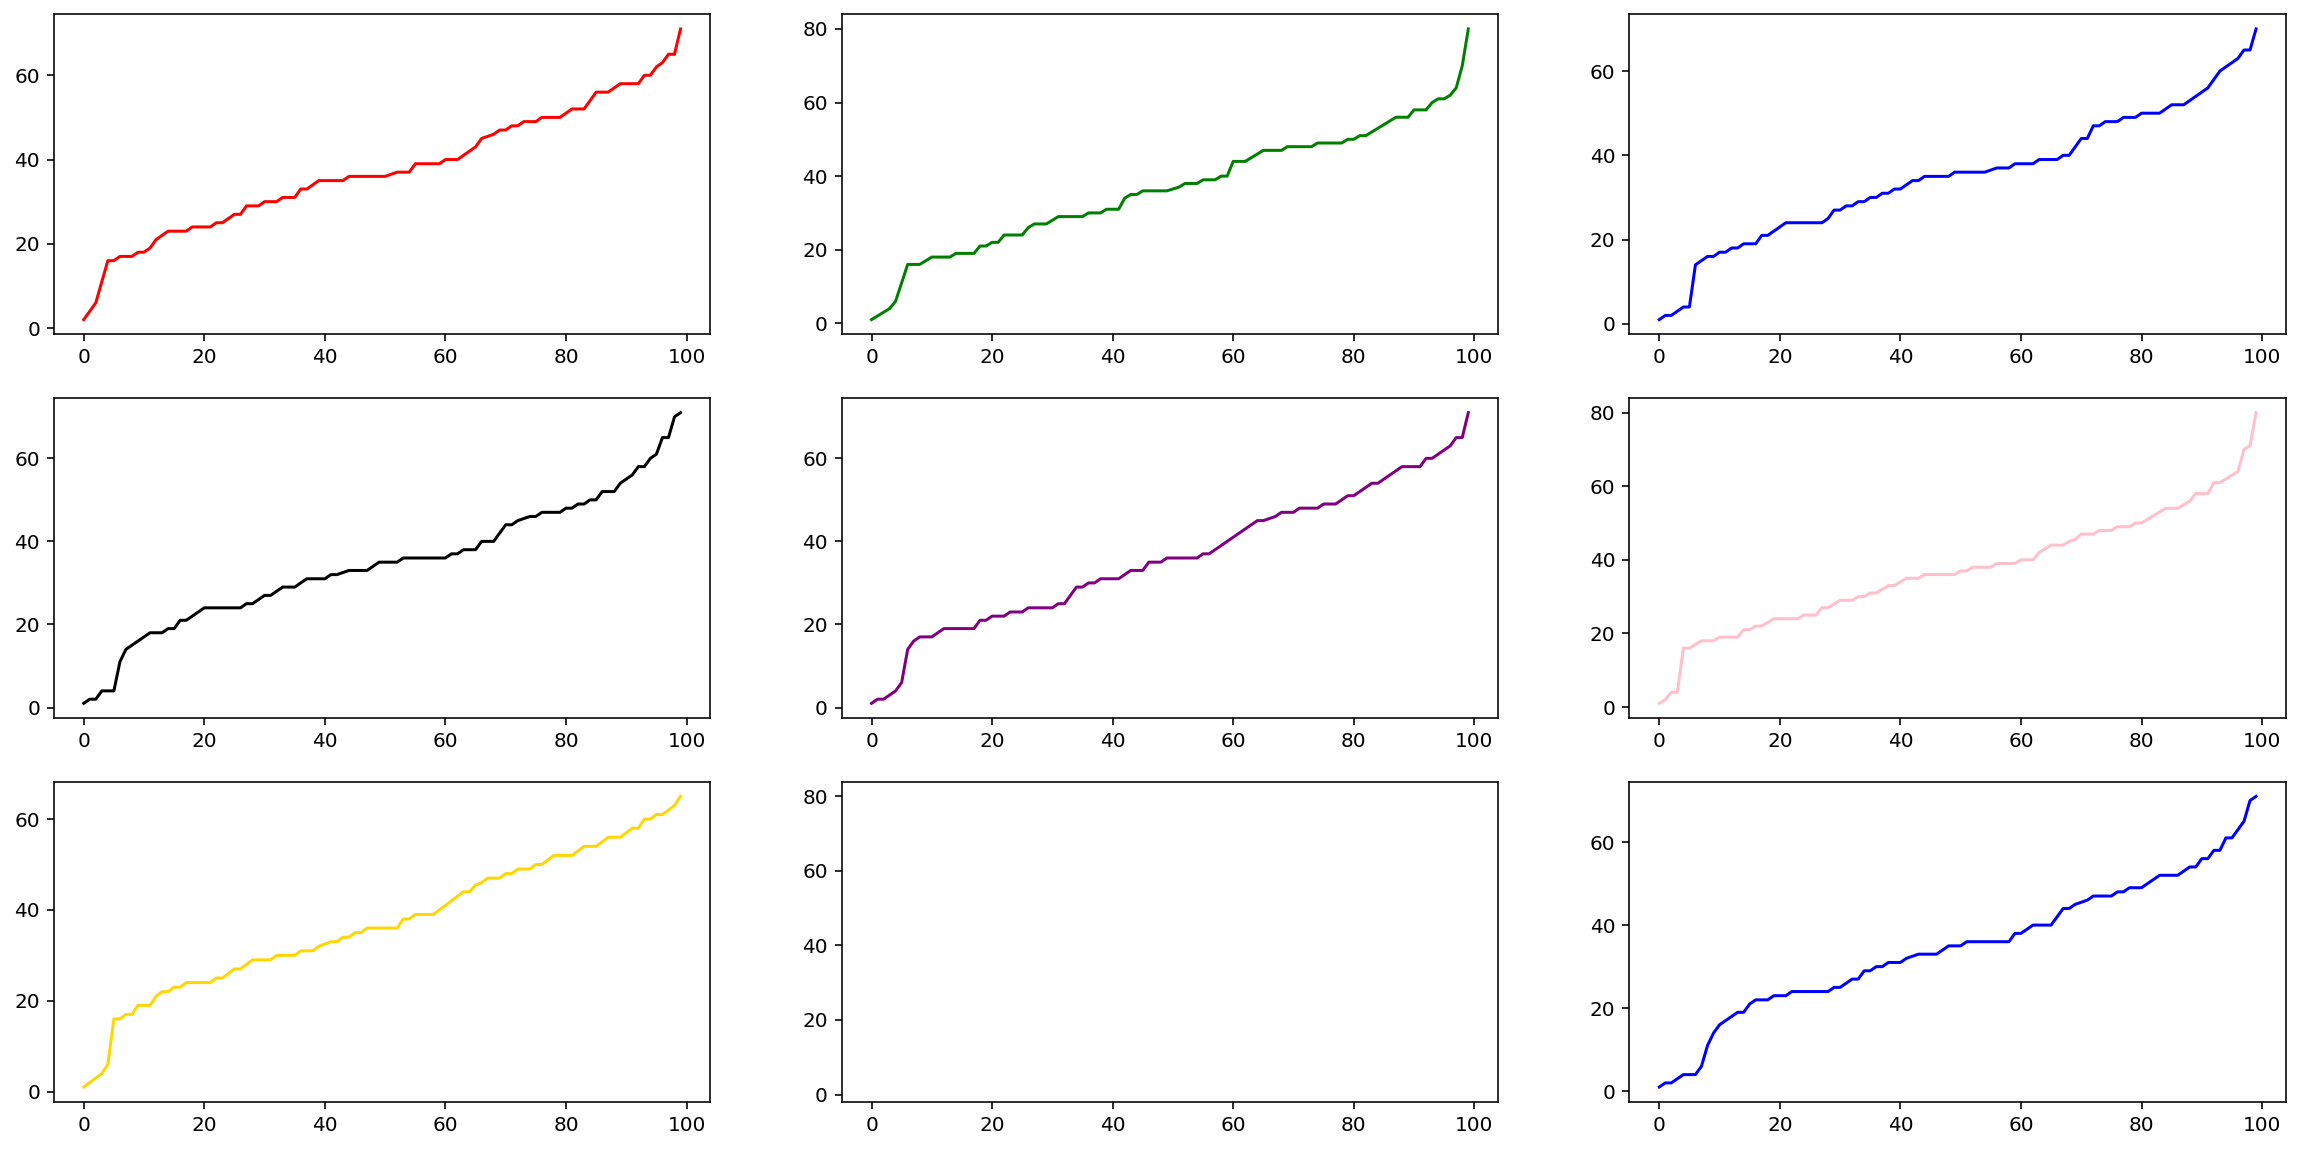

In [263]:
fig,ax=plt.subplots(figsize=(20,10),nrows=3,ncols=3)
ax[0][0].plot(np.sort(df['age'].sample(100).values),color='r')
ax[0][1].plot(np.sort(df['age'].sample(100).values),color='g')
ax[0][2].plot(np.sort(df['age'].sample(100).values),color='b')
ax[1][0].plot(np.sort(df['age'].sample(100).values),color='black')
ax[1][1].plot(np.sort(df['age'].sample(100).values),color='purple')
ax[1][2].plot(np.sort(df['age'].sample(100).values),color='pink')
ax[2][0].plot(np.sort(df['age'].sample(100).values),color='gold')
ax[2][1].plot(np.sort(df['age'].sample(100).values),color='white')
ax[2][2].plot(np.sort(df['age'].sample(100).values),color='blue')



In [265]:
#### Analysis of random 9 samples of age distribution , each sample will have 5 observations
df['age']

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 182, dtype: float64

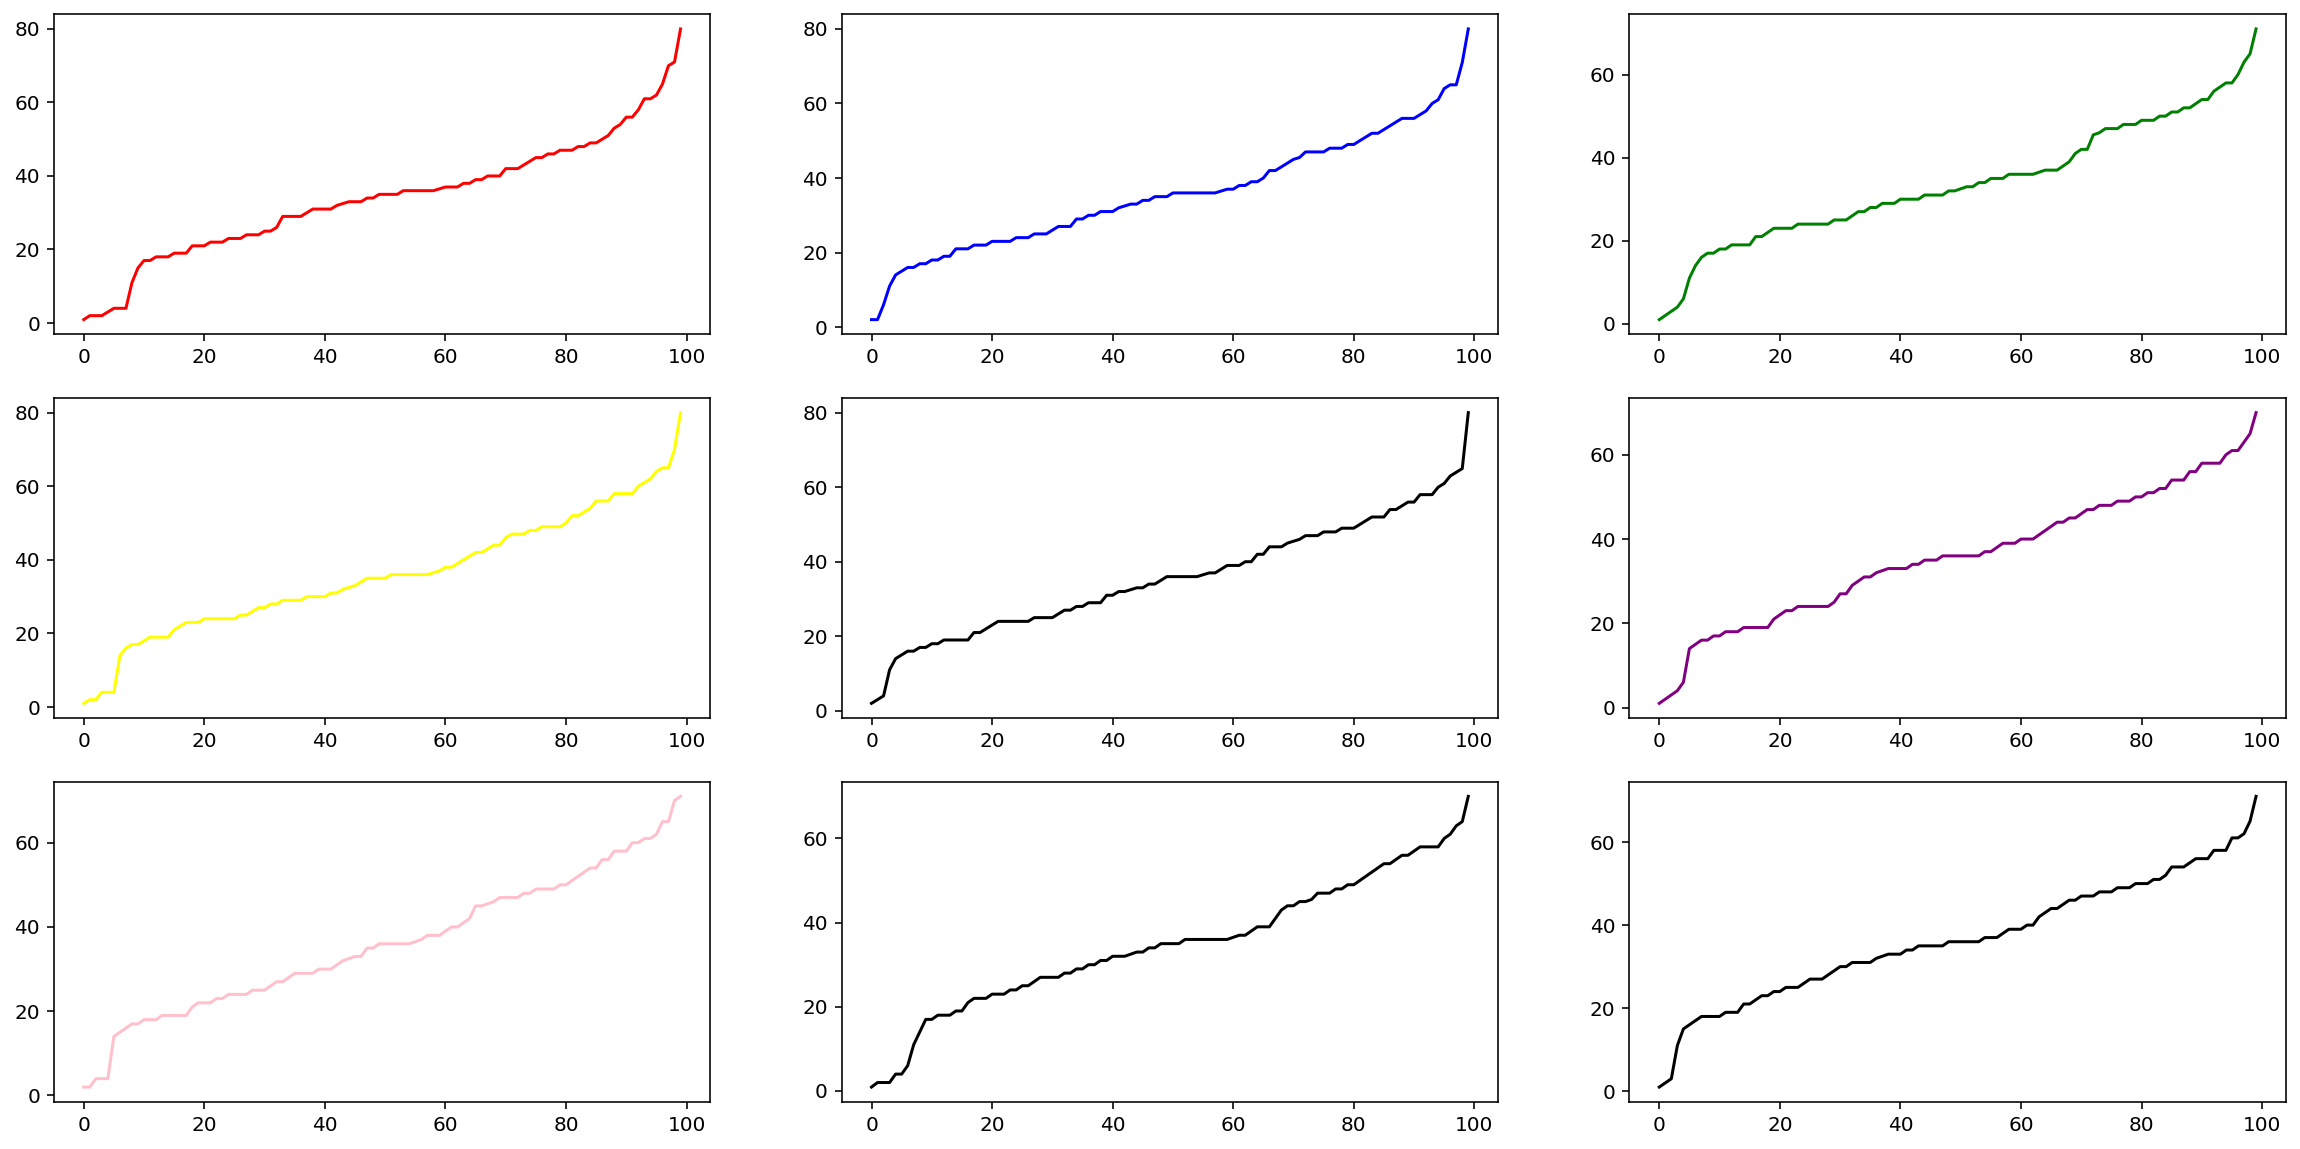

In [270]:

color_schema=['red','blue','green','yellow','black','purple','pink','black','black']
fig,ax=plt.subplots(figsize=(20,10),nrows=3,ncols=3)
number=0
for i in range(0,3):
    for j in range(0,3):
        print(ax[i][j].plot(np.sort(df['age'].sample(100).values),color=color_schema[number]))
        number=number+1




Text(0, 0.5, 'Fare')

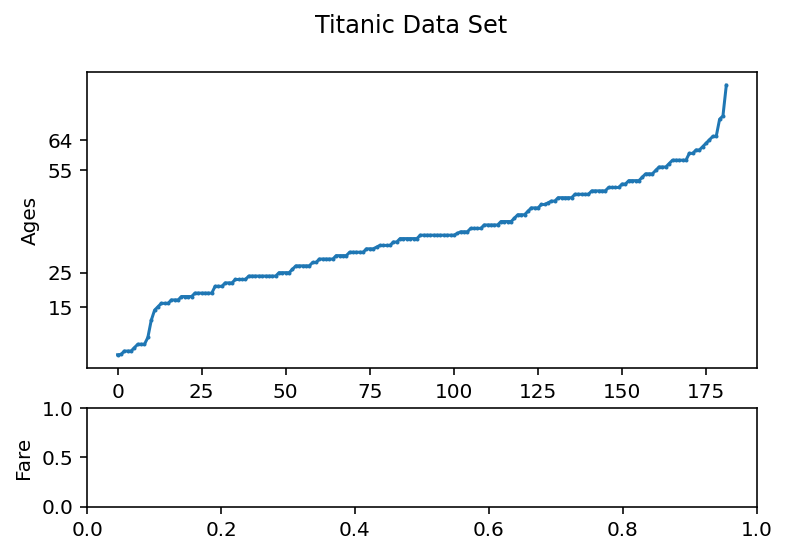

In [282]:
fig, (ax1, ax2) = plt.subplots(nrows=2,gridspec_kw={'height_ratios':[3,1]})
fig.suptitle ("Titanic Data Set")
ax1.plot(np.sort(df['age']), marker='o', markersize=1)
ax1.set_ylabel("Ages")
ax1.set_yticks([15,25, 55, 64])
ax2.set_ylabel('Fare')

If you want the axes to be one under the other, you can use `plt.subplots(nrows=2)`. You can also create a grid using `plt.subplots(ncols=2, nrows=2)`. In the grid case, plt.subplots returns a (nrows, ncols) shaped array of axes objects. 

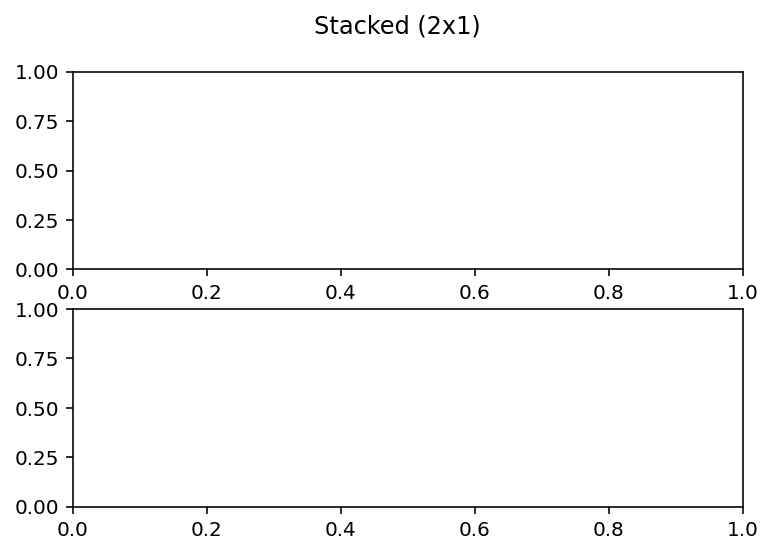

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
_ = fig.suptitle('Stacked (2x1)')

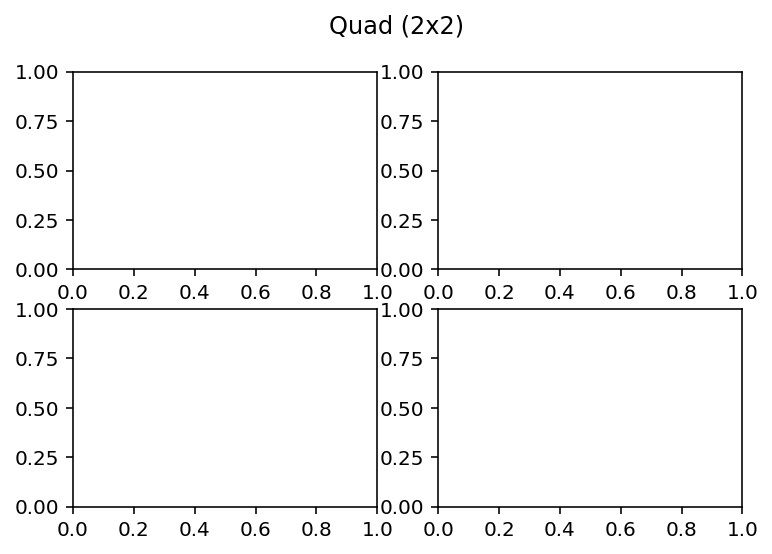

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=2)
_ = fig.suptitle('Quad (2x2)')

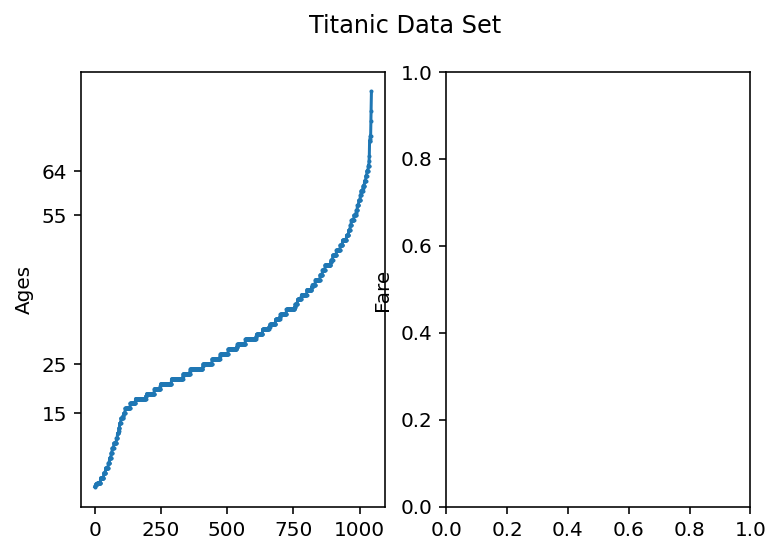

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
_ = fig.suptitle("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')

[Constrained layout](https://matplotlib.org/3.1.1/tutorials/intermediate/constrainedlayout_guide.html) is matplotlib automagic that tries to place all the elements of the image on the page such that they don't overlap but the image still has breathing room and the users instructions are respected. It is especially useful when plotting multiple images. 

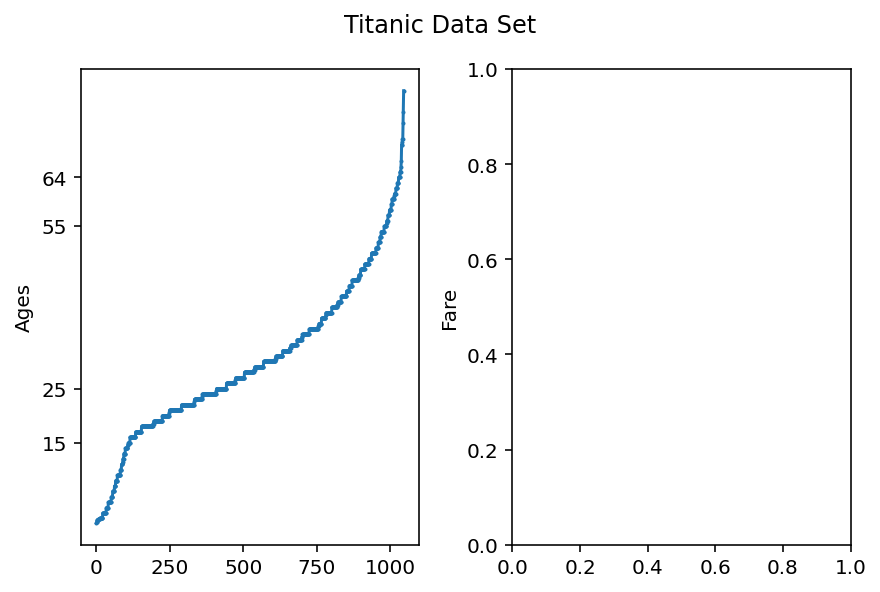

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
_ = fig.suptitle("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
# Exercise plote the fare data in the right axes

# Making images different sizes

There's a full [Gridspec API](https://matplotlib.org/3.1.1/api/gridspec_api.html#module-matplotlib.gridspec) that you can make use of, but here we will take a shortcut and use the `gridspec_kw` argument to plt.subplots(). `gridspec_kw` is a dictionary of all the keyword arguments that can be passed into Gridspec class objects.

Here, we want one image to be much thinner than the second, so we will pass the `width_ratios` argument to gridspec_kw. Here, we say we want the second plot to be 3 times wider than the first.

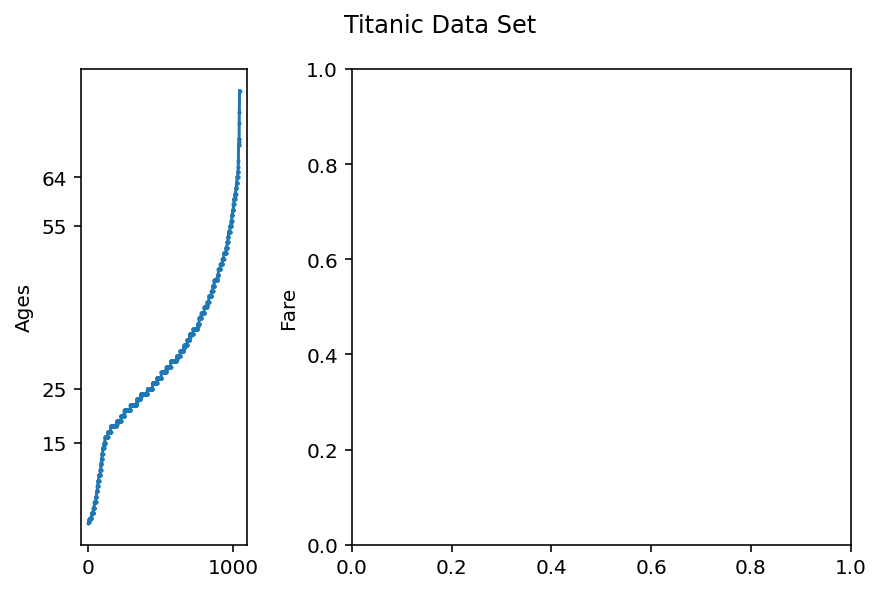

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, gridspec_kw={'width_ratios':[1,3]}, constrained_layout=True)
_ = fig.suptitle ("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')

# Practice:
1. Flip-make the ages graph wider than the fares graph
2. Rotate: put the ages graph on top of the fares graph
3. Top-heavy: in the vertical orientation from 2, make the ages graph larger 
    + hint: there's a `height_ratios` gridspec_kw

# Let's make things pretty!

Color! Texture! Style! Not only do we want to make our plots aesthetically appealing, we often want to show more than just one or two variables on our plot. Cartographer Jacques Bertin developed the following recommendations for encoding visual information (and yes, Matplotlib supports all of these visual encodings):

![table describing how points, lines, and area can be encoded with different attributes such as shape, size, hue, value, and intensity to show differences in the data](<img src="retinal-variables.png">

J. Krygier and D. Wood, Making Maps: A Visual Guide to Map Design for GIS, 1 edition. New York: The Guilford Press, 2005.


In [283]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The titanic dataset has no continuous data, so here we demonstrate manipulating a line plot using sine waves. We use the numpy library to generate our sine and cosine waves. Here the x values are 1000 values equally spaced between 0 and 2$\pi$

# Let's make a line plot

In [26]:
x = np.linspace(0,2*np.pi, 100)
sin_x = np.sin(x)

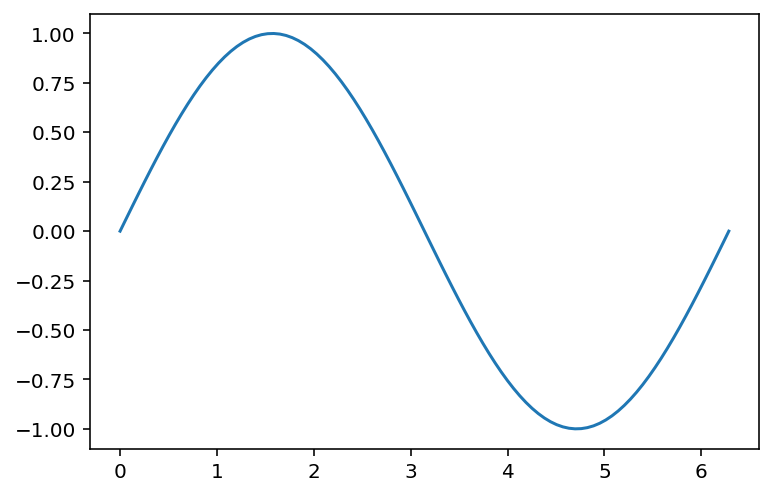

In [27]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x)

### Set the aspect ratio

The x and y on a sin curve should have equal aspect because they are in the same units. To reflect this in our visualization, we use the .set_aspect function

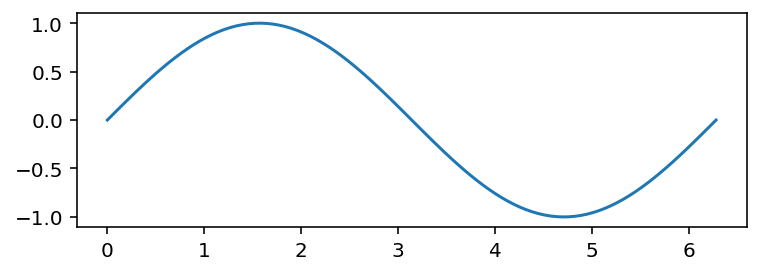

In [28]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x)
_ = ax.set_aspect('equal')

# What are the points being plotted?

We can use the marker *kwarg* to put a marker at every x,y pair. You can find a listing of marker styles in the [marker reference](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html) or make [custom markers](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/marker_reference.html). We make the figure using the `figsize=(h,w)` kwarg so that we can see the markers. 

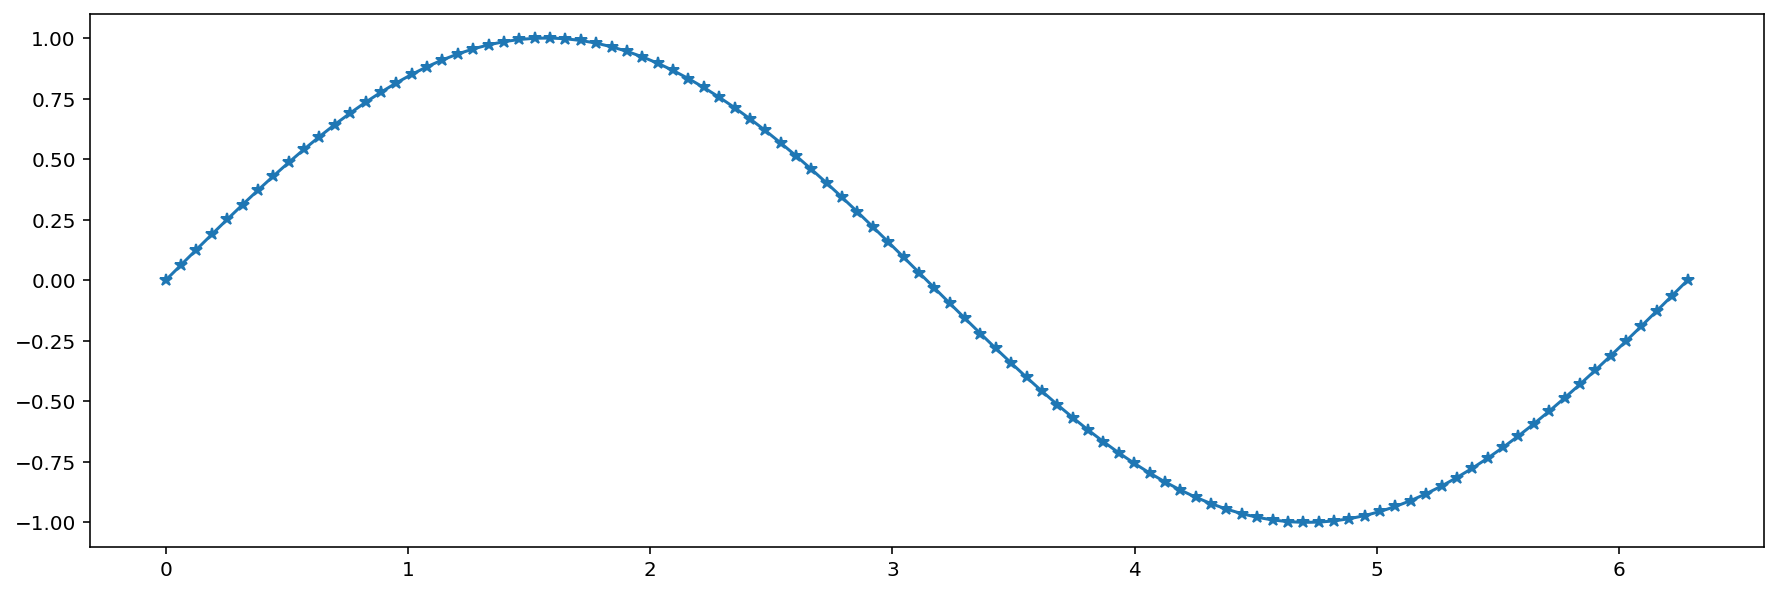

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, marker='*')
_ = ax.set_aspect('equal')

# Let's change colors

It's hard to see the markers and the lines, so we can change the colors of our marker or lines (or both). We are modifying the following parameters here:
* `color` - changes the color of the line
* `markerfacecolor` - changes the face color of the marker
* `markeredgecolor` - changes the edge color of the marker 

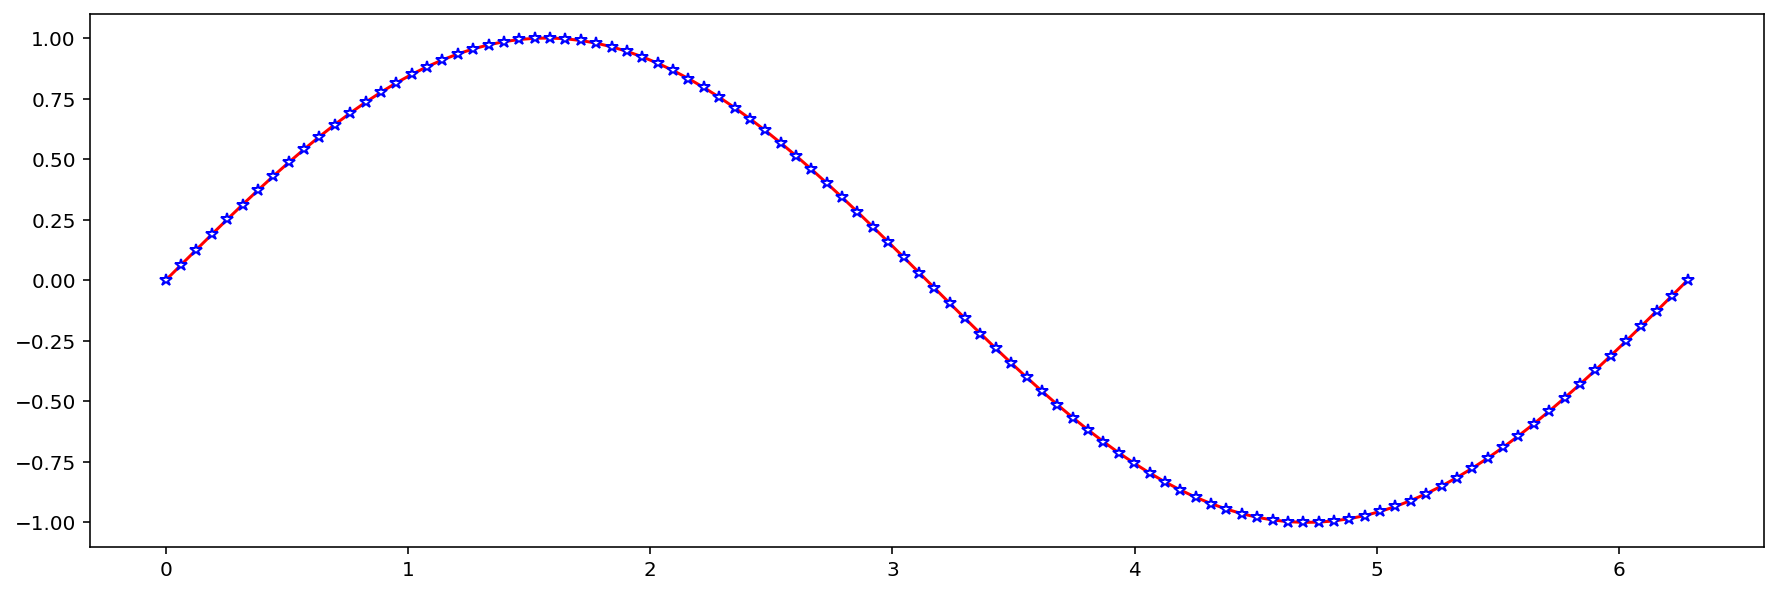

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, marker='*', markerfacecolor='white', markeredgecolor='blue', color='red')
_ = ax.set_aspect('equal')

# Let's modify the size

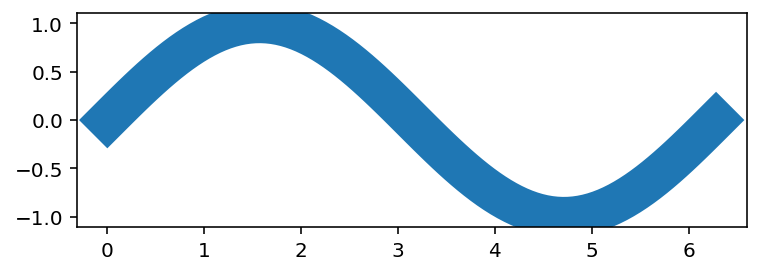

In [31]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x, markersize=20, linewidth=20)
_ = ax.set_aspect('equal')

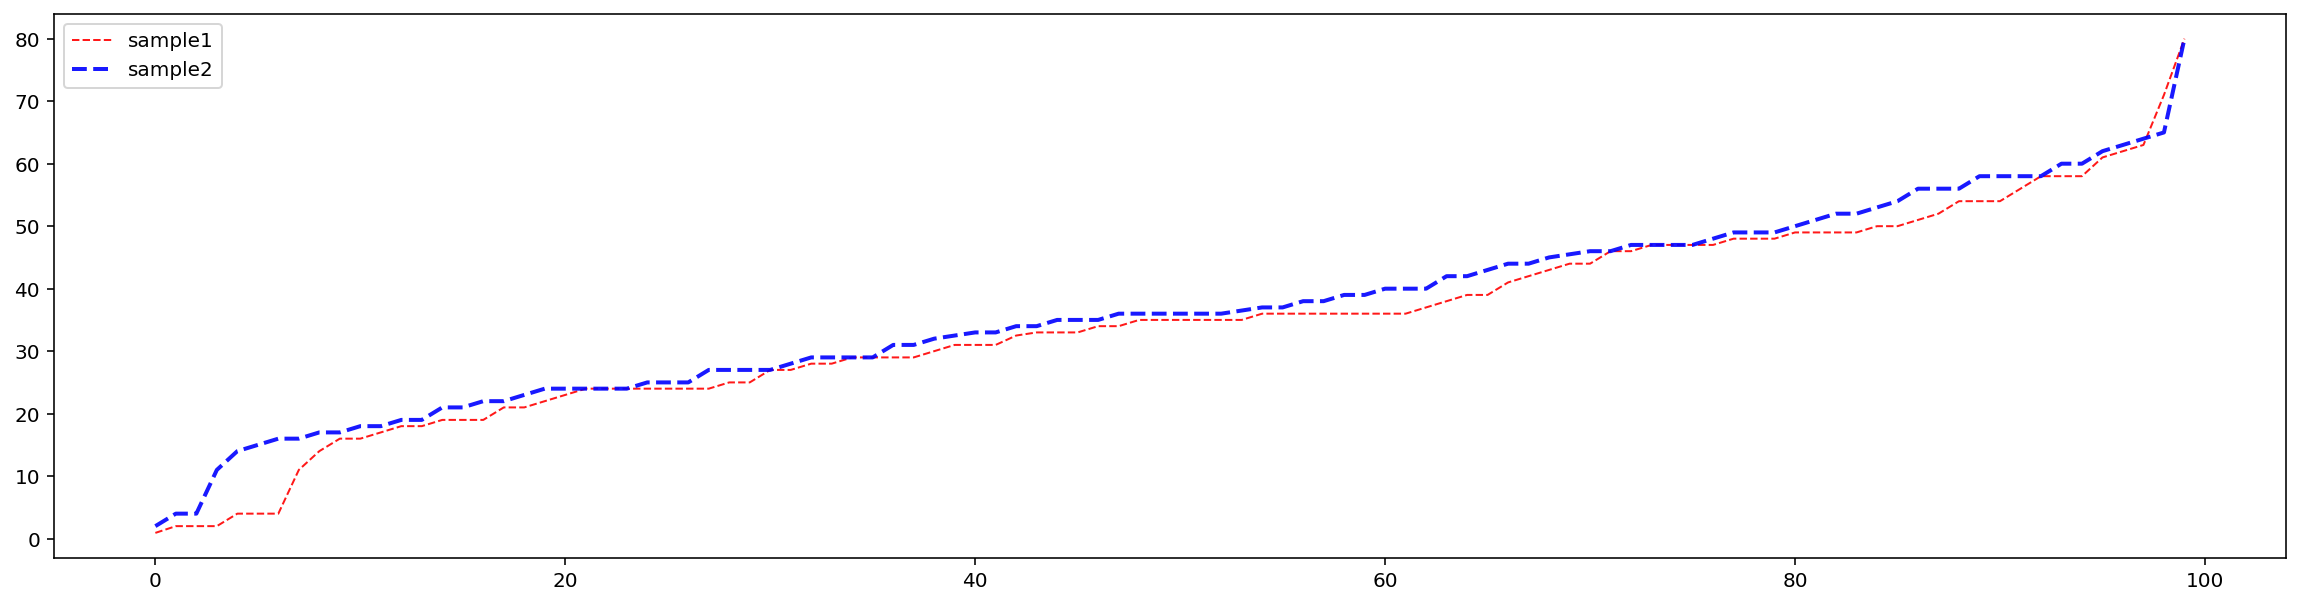

In [323]:
fig,ax=plt.subplots(figsize=(20,5))
ax.plot(np.sort(df['age'].sample(100)),color='r',linewidth=1,alpha=0.9,linestyle="--",label="sample1")
ax.plot(np.sort(df['age'].sample(100)),color='b',linewidth=2,alpha=0.9,linestyle="--",label="sample2")
ax.legend()

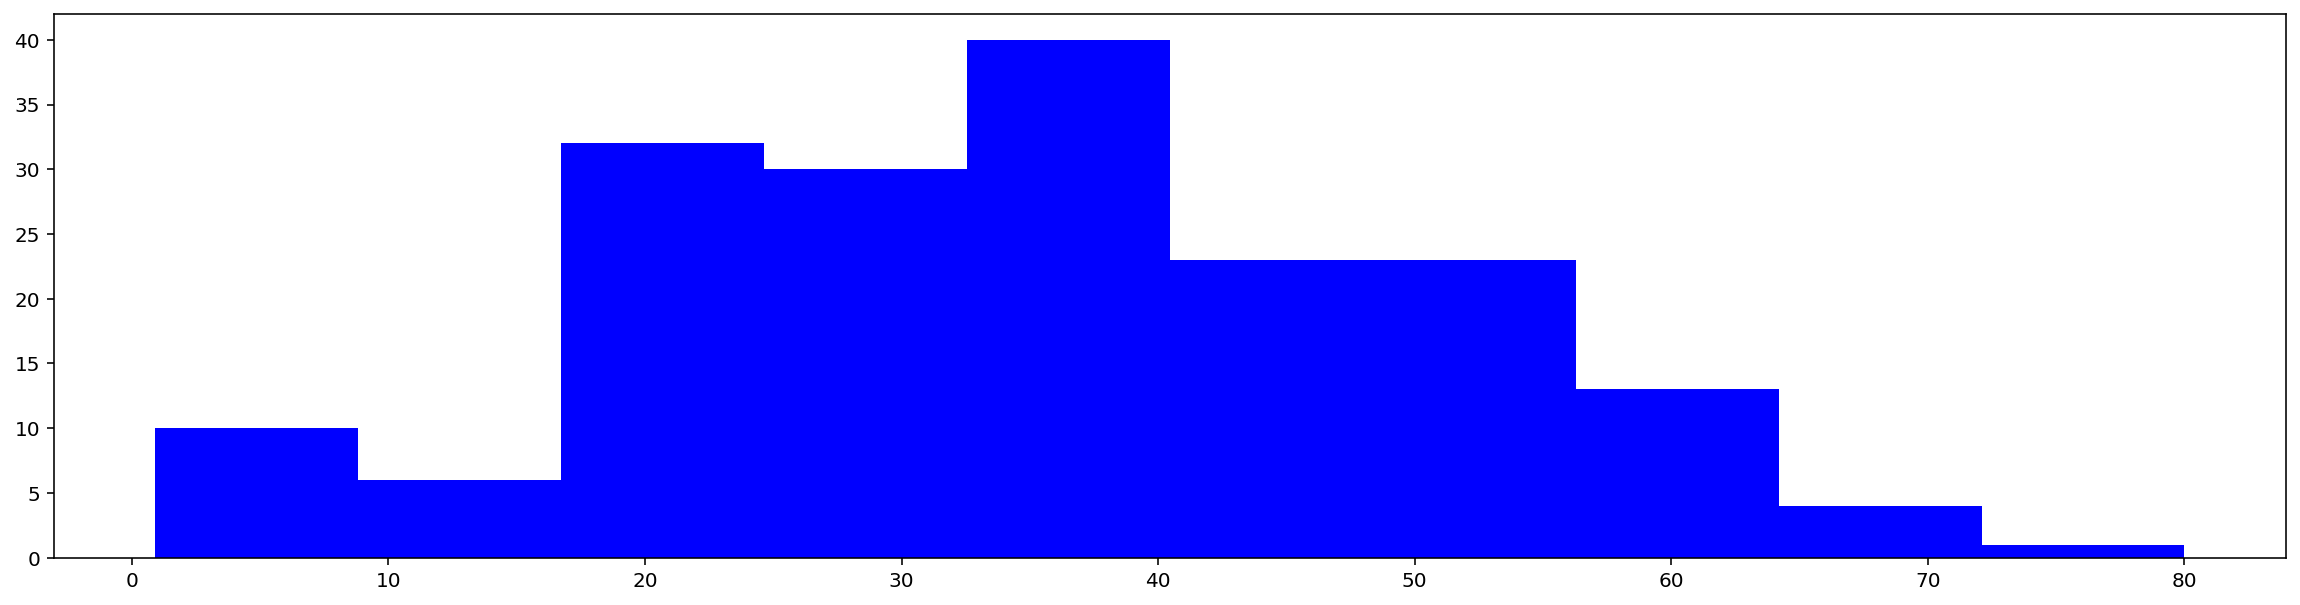

In [330]:
fig

(array([10.,  6., 32., 30., 40., 23., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <BarContainer object of 10 artists>)

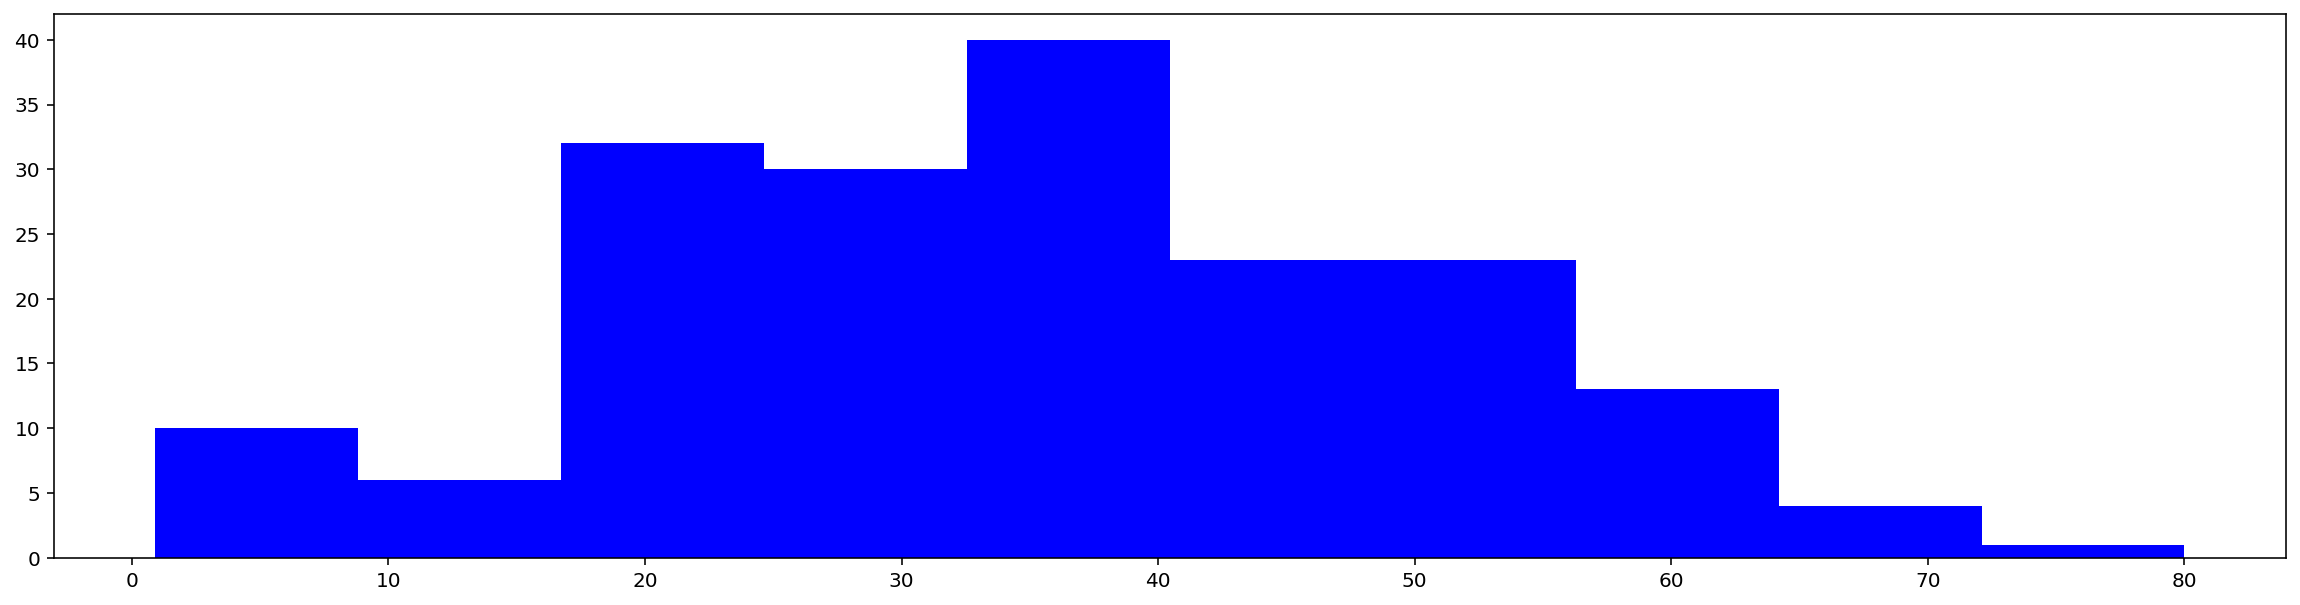

In [328]:
fig,ax=plt.subplots(figsize=(20,5))
ax.hist(df['age'],color='blue')

In [338]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [345]:
df['sibsp'].unique()

array([1, 0, 3, 2], dtype=int64)

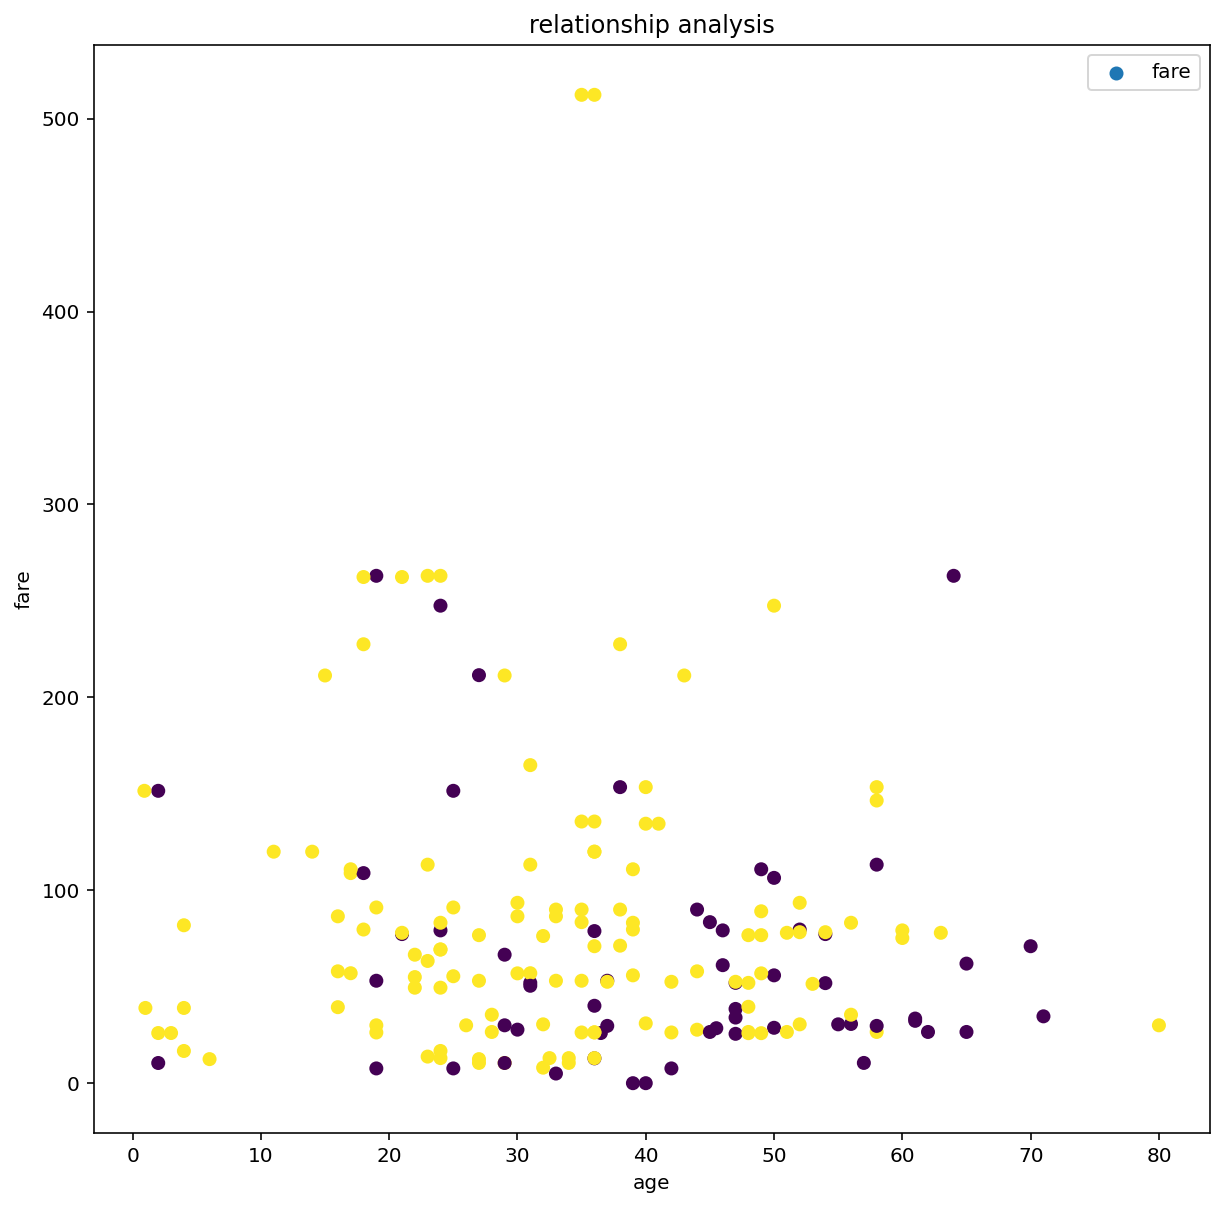

In [347]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter('age','fare',c='survived',data=df)
ax.set_xlabel("age")
ax.set_ylabel("fare")
ax.set_title("relationship analysis")
ax.legend()

# Let's change up the whole line by adding texture

Sometimes we need to do vary the texture of the line. We can do this using the [linestyles parameter](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)

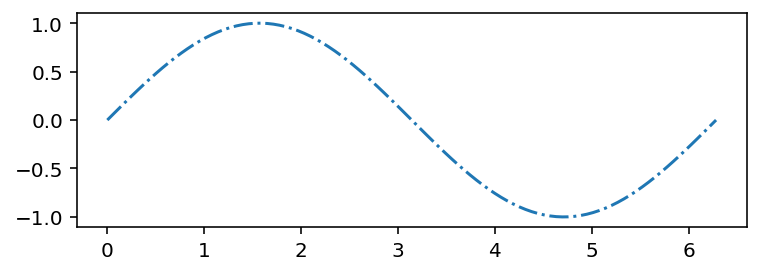

In [32]:
fig, ax = plt.subplots()
_ = ax.plot(x, sin_x, markersize=20, linestyle='-.')
_ = ax.set_aspect('equal')

# Let's digitally sample our sin curve

Sometimes our data is sampled at step intervals and we want to reflect that in our line. We can do this using the [`drawstyle` parameter](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html?highlight=drawstyle#matplotlib.lines.Line2D.set_drawstyle). 

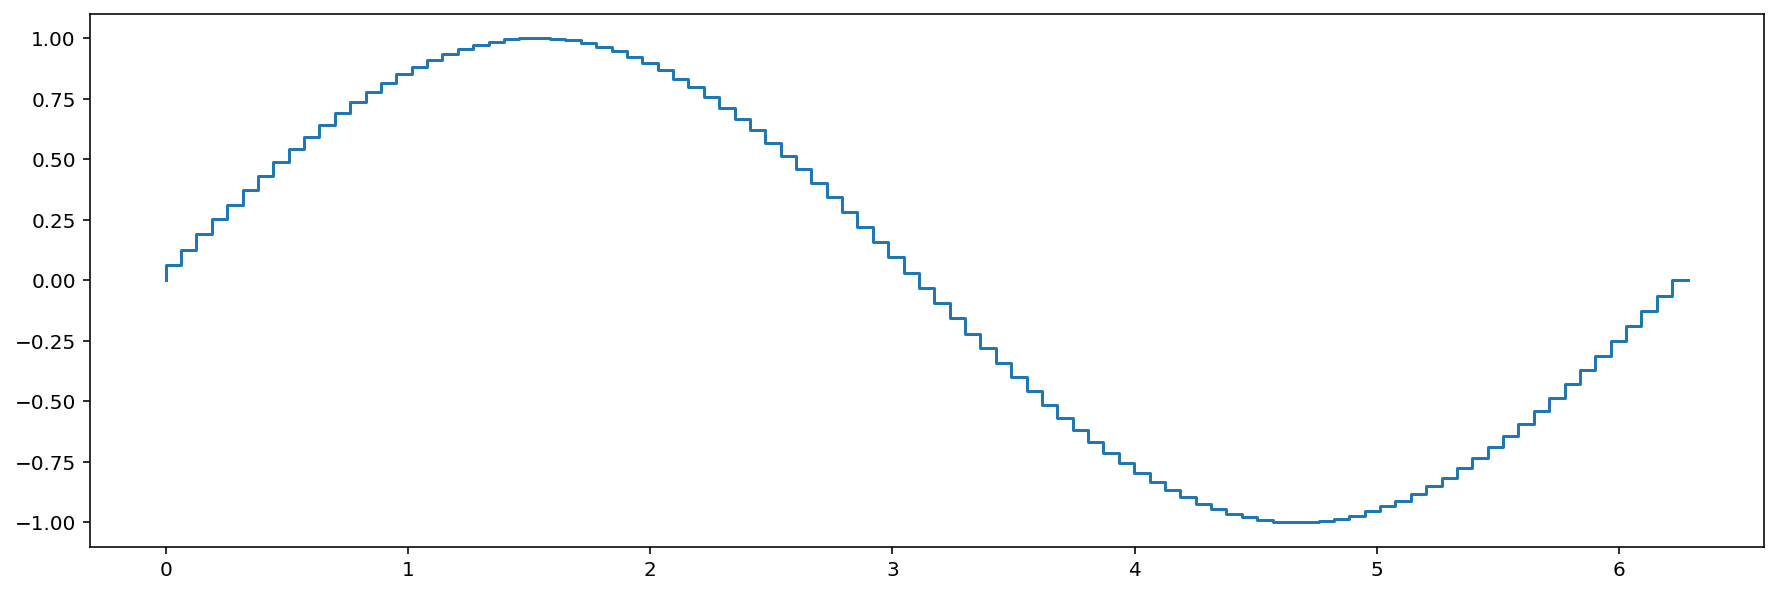

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
_ = ax.plot(x, sin_x, drawstyle='steps')
_ = ax.set_aspect('equal')

# Let's add a legend

We add a legend using the `label` parameter. Then we use `ax.legend` to display the legend. More information on customizing the legend position and appearance can be found in the [legend guide](https://matplotlib.org/3.1.0/tutorials/intermediate/legend_guide.html). 

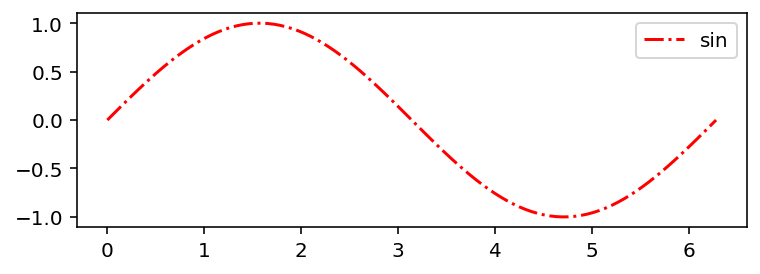

In [34]:
fig, ax = plt.subplots()
ax.plot(x, sin_x, markersize=20, linestyle='-.', color='red', label='sin')
ax.set_aspect('equal')
ax.legend()

# Put it all together
1. add a *cosine* plot to the axis (hint: ax.plot(x, ...)) is totally acceptable)
3. make the *cosine* line bigger than the sin 
2. style the *cosine* as a dotted line (hint ':' is the short code for dotted)
3. color the *cosine* line purple
4. label the *cosine* and display the legend

In [ ]:
# work through the practice

# Let's go back to our passenger records

Let's do a little data cleaning using the `.dropna` method, which here drops any row containing a NaN. 

In [35]:
df = pd.read_csv("http://bit.ly/tcsv19").dropna()

You can use `df.head()` to take a quick peak at the data.  This is helpful to remind ourselves what the column names and datatypes are!

In [36]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


# First let's display some data using scatter

Here we are going to compare the age of the passengers to the fare they paid, because we want to see if there is a correlation. Traditionally scatter plots are used for these types of plots. Scatter takes the x and y plot
Scatter can show 4 dimensions of data as users can encode variables as the x and y positions, size and color of the markers in one call of the function, and you can modify the shape via multiple calls to scatter. 

To start with, lets plot the passenger age against the fare paid:

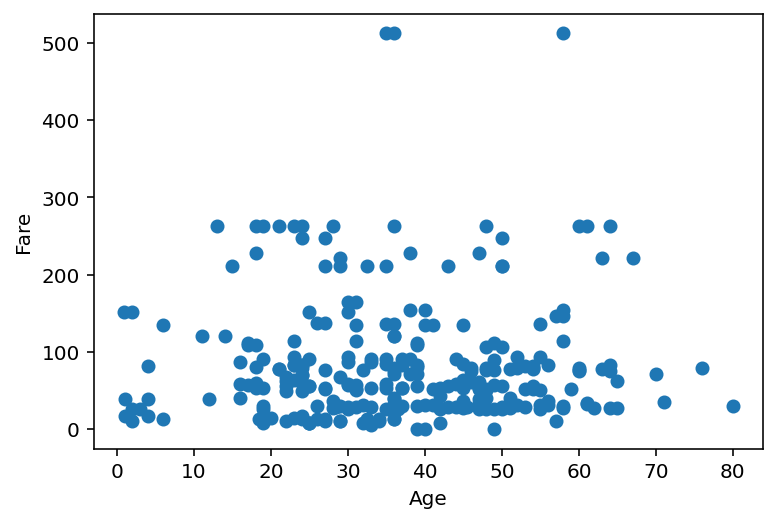

In [37]:
fig, ax = plt.subplots()
_ = ax.scatter(df['age'], df['fare'])
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Fare')

# Simplify code using the data kwarg

The `data` kwarg takes in any labeled data (dictionary, dataframe, record array, etc) and unpacks it for you based on the labels passed in as x, y, etc, kwargs. 

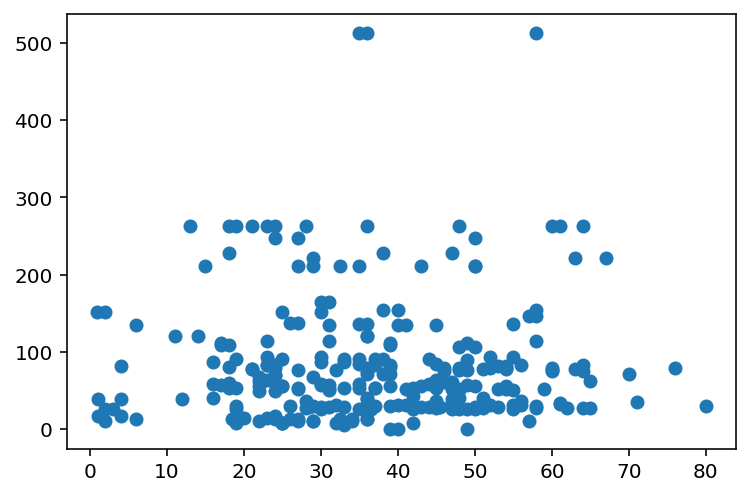

In [38]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', data=df)

# Label all the things using set

Setting each label individually using the .set_ methods can get tedious, so there's a meta-set function you can use to set all the labels in one shot. 

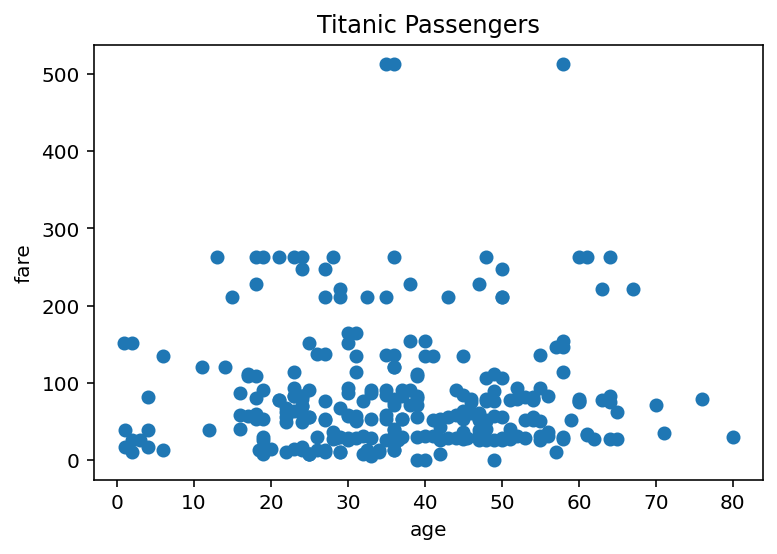

In [39]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', data=df)
_ = ax.set(xlabel='age', ylabel='fare', title='Titanic Passengers')

# Let's change the color

While that blue is lovely, sometimes we might want our dots to be a different color. Here we will use the color *kwarg* to change the color of our dots to hotpink. 

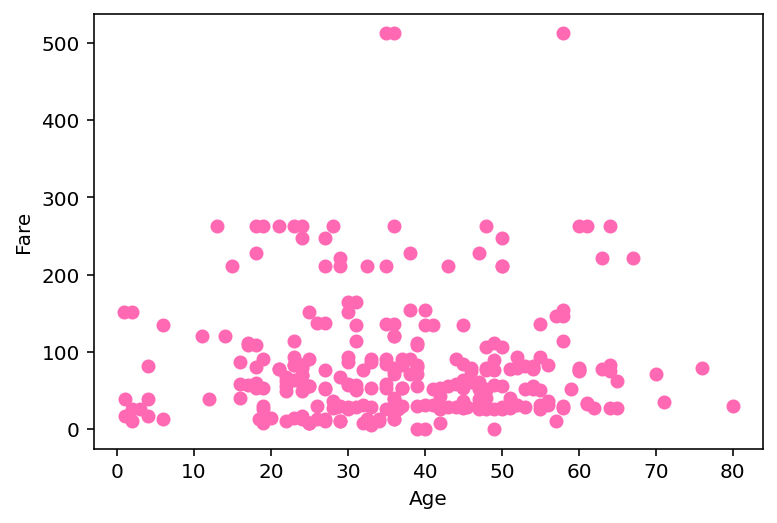

In [40]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', color='hotpink', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')


# Let's encode data using color

Is there a difference in age and fare between people who survived and people who didn't? Here we will color the dots based on the survived column (remember 0 is dead and 1 is alive) using the `c` keyword arg. . The colors are yellow and purple because they are from the default [matplotlib colormap](https://matplotlib.org/examples/color/colormaps_reference.html) Viridis.

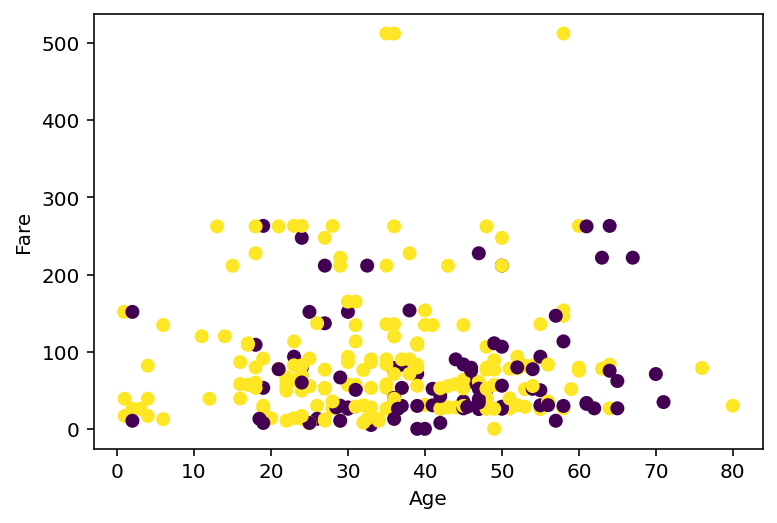

In [41]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')


# Lets customize those colors

The viridis colormap is designed for quantitative datasets and survived is categorical. Instead of using the default, let's use a categorical colormap to make things prettier. You can find a full list of colormaps at the [colormap reference ](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). 

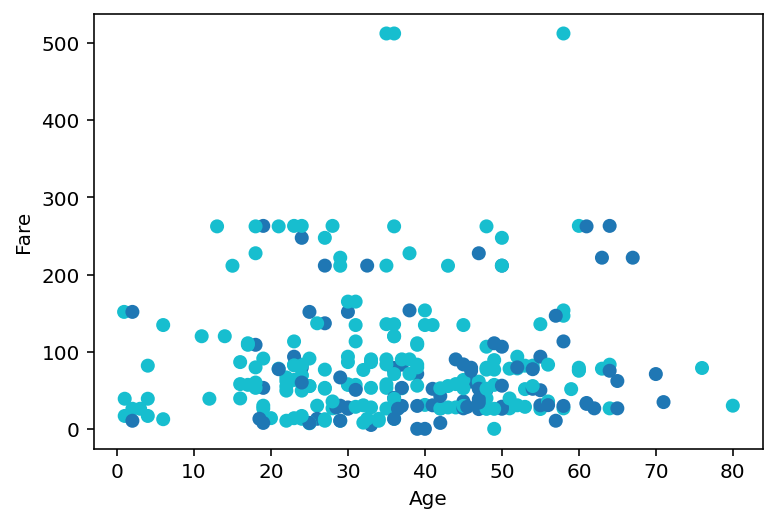

In [42]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', cmap='tab10', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')

Still not great, so we're going to create a `ListedColormap` so we can set the colors manually. We get the [listed colormap](https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html) from the [colors module](https://matplotlib.org/api/colors_api.html).

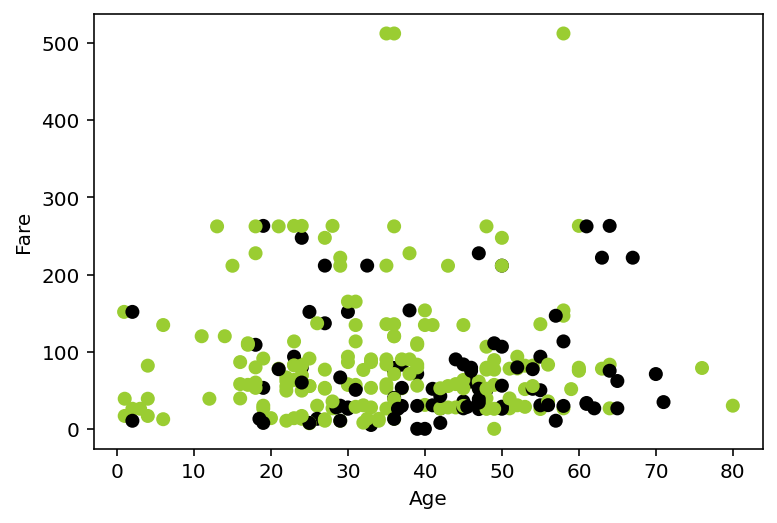

In [43]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['black', 'yellowgreen'])
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')

# Let's add a legend

We can't just use the label parameter here because we get one label per call of the `scatter` function and here we need multiple labels. Instead, we can make use of the fairly new [scatter legend](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html#automated-legend-creation) functionality to generate a label based on the colors. Here we assign the output of ax.scatter to the `sc` variable because will need to use the sc object to generate the legend.

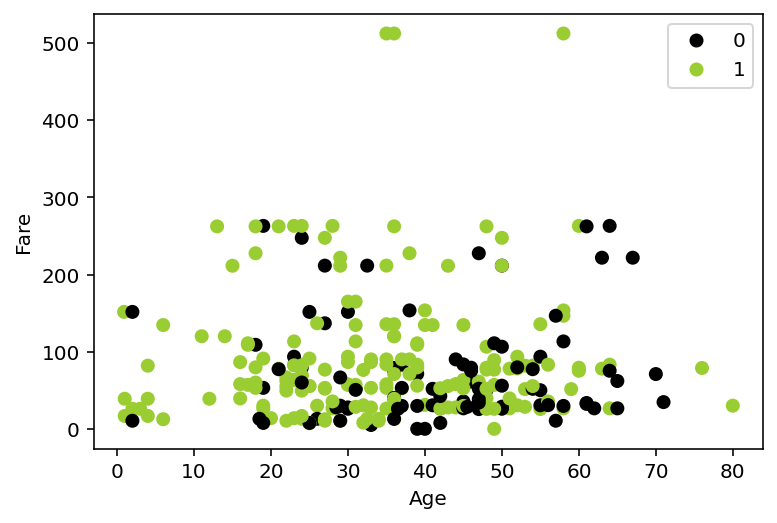

In [44]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(*sc.legend_elements())

## Lets add custom labels

`sc.legend_elements()` returns two lists:
* handles: plot objects displayed in the legend (in this case the scatter points)
* labels: the label attached to each handle

In  this case, labels are 0 and 1 because that's what was passed in as the color, so we overwrite the default labels with our custom ones.

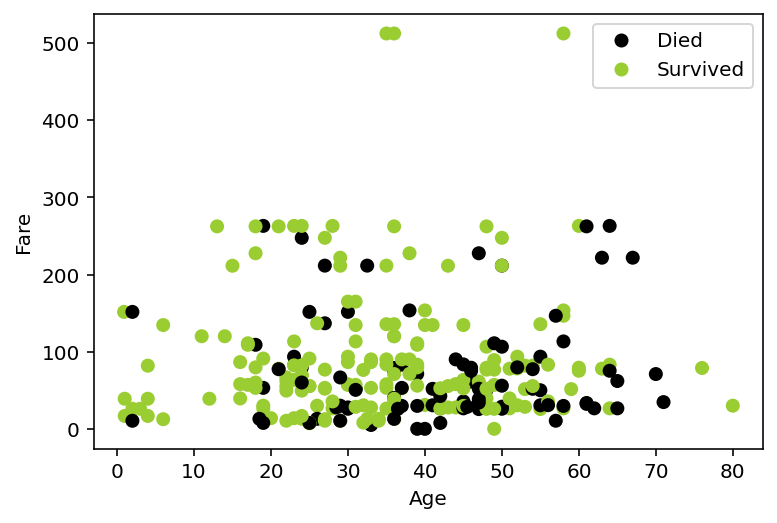

In [45]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Let's clean up a bit because large dataset

Lets add some transparency using the alpha keyword because there are a lot of dots. Then we set the border of our dots to black to get some definition.

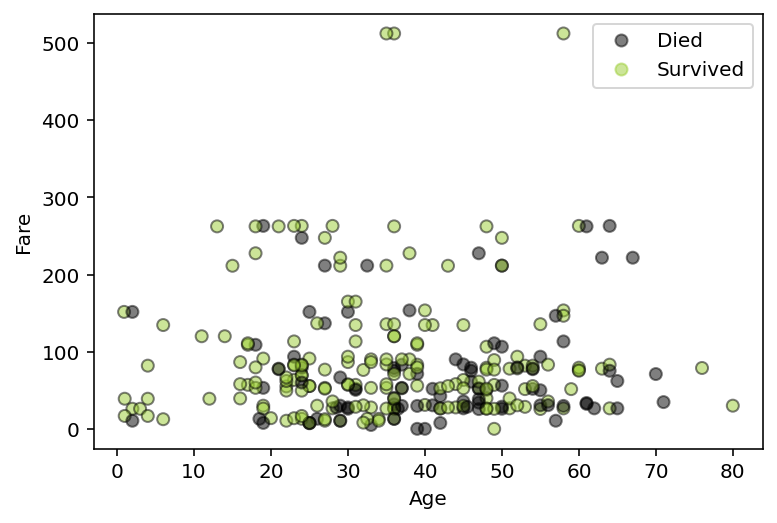

In [46]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Encode even more information: Bubble Chart

Is there a pattern in age and fare and survival...and the passenger class? We can encode one more variable (in this case `pclass`) as the size of the point. 

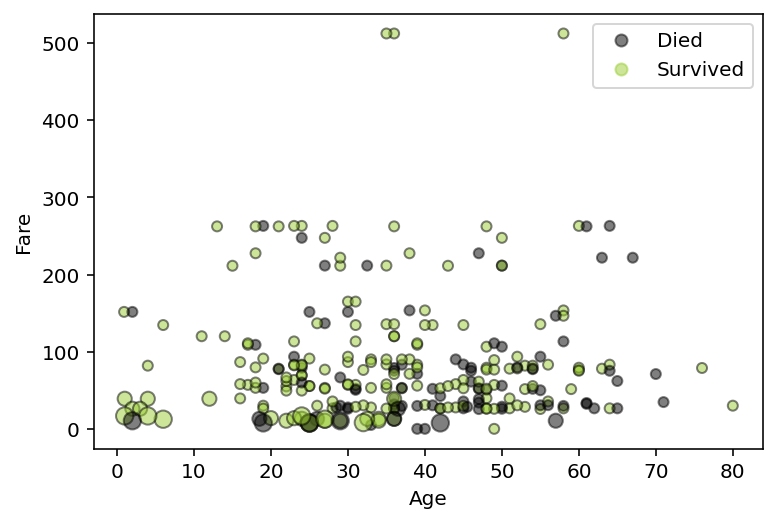

In [47]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, 
                edgecolor='black', s = df['pclass']*25, data=df)
_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Visual Overload: markers

We're not done yet, because we can still encode the shape of the point! Here we have to use two seperate functional calls to scatter to set the markers. Lets see how sex (as recorded in these logs) factors into survival rates.

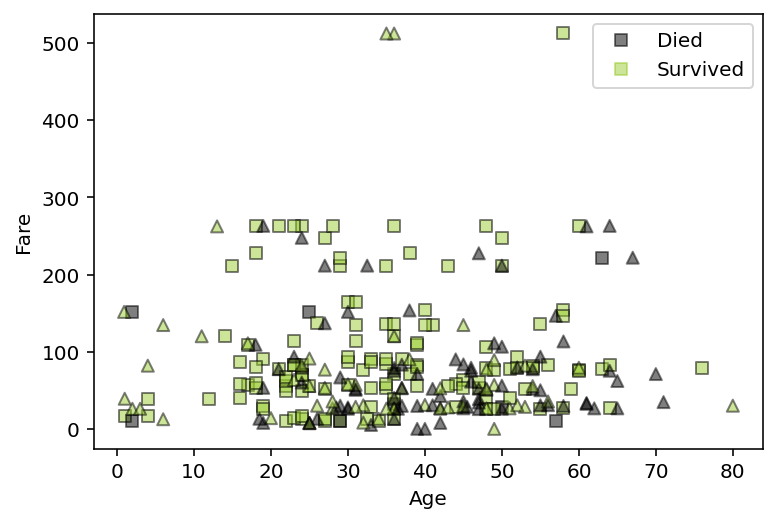

In [48]:
fig, ax = plt.subplots()

sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='s',label='Female', data=df[df['sex'].str.match('female')])
sc2 = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='^',label='male', data=df[df['sex'].str.match('male')])

_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

# Putting it all together: Information overload
As a reminder, these are the variables in the dataset:
* categorical: 'pclass', 'survived', 'sex', 'embarked'
* quantitative: 'age', 'sibsp', 'parch', 'fare',
* qualitative: 'name',  'ticket',  'cabin',

Create a scatter plot exploring the relationship between:
1. family size and fare and age and survival
2. can you throw in an additional variable?
3. what interactions are you interested in unpacking? post your figure to the slack

# Seperate a bit, but interact

At a certain point, there are diminishing returns to trying to to cram more information into one scatter plot. Instead, matplotlib supports linking two plots together via the sharex/sharey parameters to `plt.subplots`. Here it's used to link two plots, one for each sex. 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
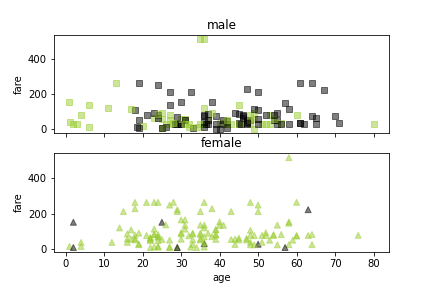

In [49]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
x, y, c, s = 'age', 'fare', 'survived', 'pclass'

_ = ax1.scatter(x, y, c=c, cmap=cmap, alpha=.5,  marker='s', data=df[df['sex'] =='male'])
_ = ax2.scatter(x, y, c=c, cmap=cmap, alpha=.5, marker='^', data=df[df['sex'] =='female'])
_ = ax1.set(ylabel=y, title='male')
_ = ax2.set(xlabel=x, ylabel=y, title='female')


First let's import the data and remake one of the figures from the [overview](01_overview.ipynb) notebook. 

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("http://bit.ly/tcsv19").dropna()

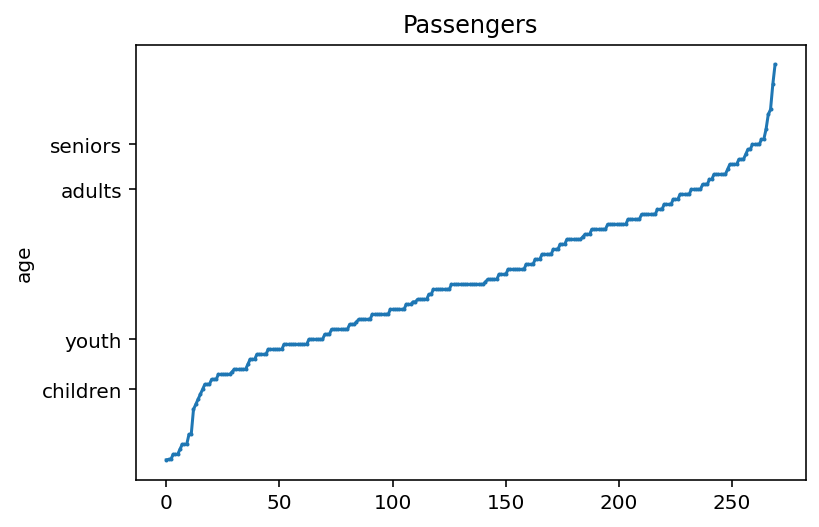

In [51]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set(title='Passengers', ylabel='age')
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

The above figure is a expected cumulative distribution graph. It shows that most passengers are adults, but it is a bit hard to do comparisons, especially at the tales. Instead, we compute the histogram of passenger ages. 

# Let's make Histograms

Here we call the histogram function. Bins = 'auto' tries to find the optimal number of bins using methods described in the numpy [histogram docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges). 

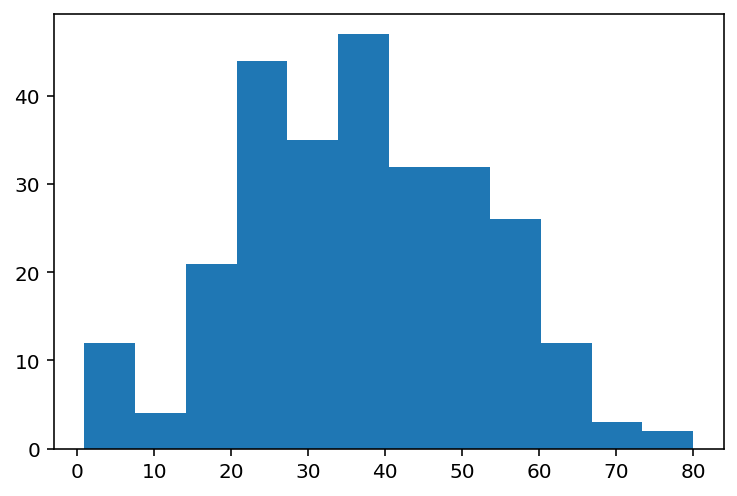

In [52]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins='auto', data=df)

## Custom Bins to match our CDF

In our line plot, we use bins based on the census-a commonly accepted binning for ages. We can pass those bins into our histogram function via the `bins` parameter. 

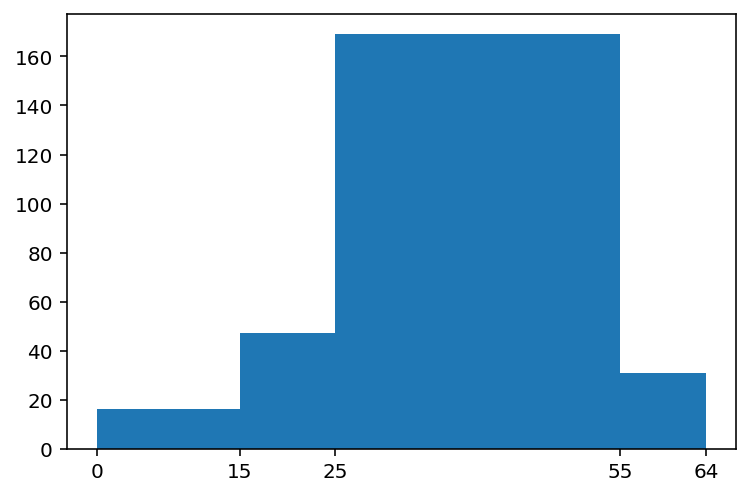

In [53]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins=[0, 15,25, 55, 64], data=df)
_ = ax.set_xticks([0, 15,25, 55, 64])

### Probability density

By default `ax.hist` returns the number in each bin and the bin edges used.  The bin edges array is 1 longer than the counts because it is all of the left bin edges and then right edge of the last bin.  This is useful when we need to compare absolute values between data sets, but sometime we need to be able to compare the probability density instead.  In the continuous limit, probability density has the condition:

$$1 = \int_{-\infty}^{\infty} P(x)dx$$

and in the discrete case:
$$1 = \sum_{n=0}^N w_n p_n$$

where $w_n$ is the width of the nth bin. We set the `density` parameter to true to plot the density of the data. 

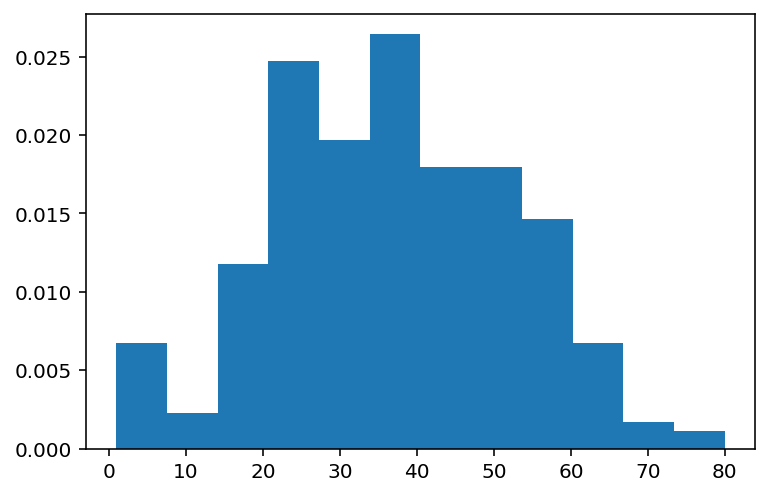

In [54]:
fig, ax = plt.subplots()
# only consider rows where we know the age
(density, edges, _) = ax.hist('age', bins='auto', data=df, density=True)

assert np.sum(np.diff(edges) * density) == 1

## Practice:
1. Make histogram of fares
2. Use the bins defined in the [overview](01_overview.ipynb)

# Use groupby to simplify code

Groupby is used to gather all rows that have one observation of one variable in common. For example, a `.groupby('sex')` gathers all the rows where the sex is male and puts them in one dataframe, and puts all the rows where the sex is female into a second dataframe. The next step in a groupby operation is usually to then aggregate these dataframes using some function (mean, median, etc) to get aggregate statistics for each variable (step 2 in the image above) but we can also make use of the individual dataframes. 

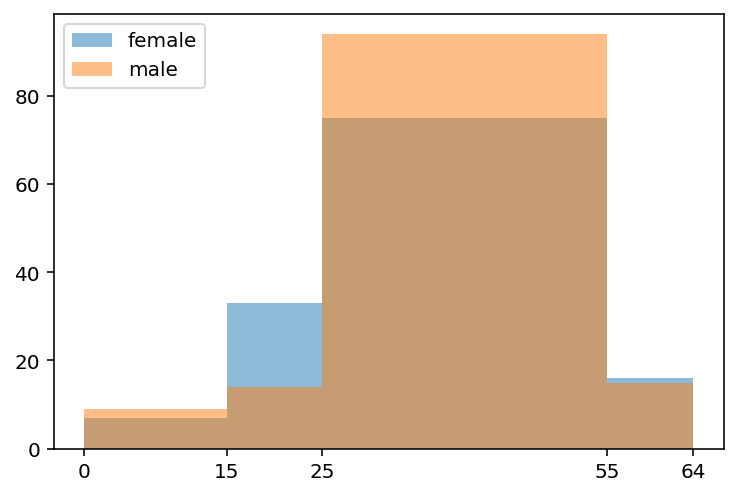

In [55]:
fig, ax = plt.subplots()
# only consider rows where we know the age
for label, gdf in df.groupby('sex'):
    ax.hist('age', bins=[0, 15,25, 55, 64], data=gdf, label=label, alpha=.5)
_ = ax.set_xticks([0, 15,25, 55, 64])
_ = ax.legend()

In [ ]:
fig, ax = plt.subplots()

sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='s',label='Female', data=df[df['sex'].str.match('female')])
sc2 = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                marker='^',label='male', data=df[df['sex'].str.match('male')])

_ = ax.set(xlabel = 'Age', ylabel = 'Fare')
_ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

In [350]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


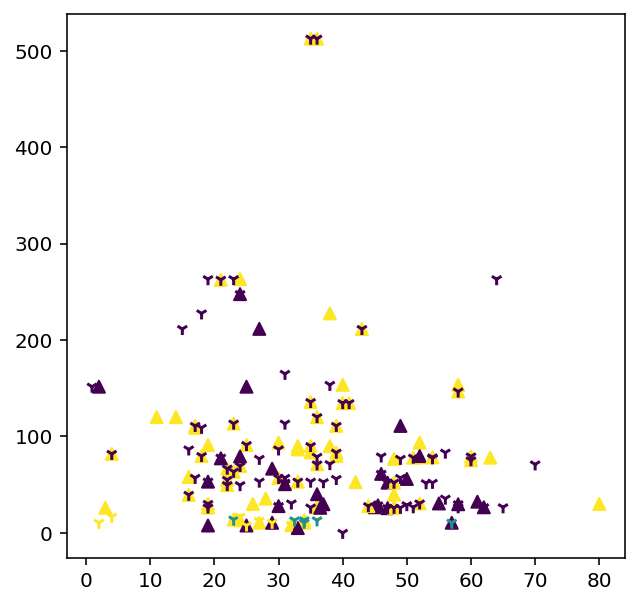

In [371]:
fig,ax=plt.subplots(figsize=(5,5))
df1=df.sample(100)
df2=df.sample(100)
ax.scatter('age','fare',c='survived',data=df1,marker="^")
ax.scatter('age','fare',c='pclass',data=df2,marker="1")
